# Funciones Auxiliares

In [41]:
library(MASS)
library(rpart)
library(class)
install.packages("randomForest")
library(randomForest)
install.packages("kernlab")
library(kernlab)
library(readr)
install.packages("e1071")
library(e1071)
library(ggplot2)
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Ejercicio 1

## Crabs

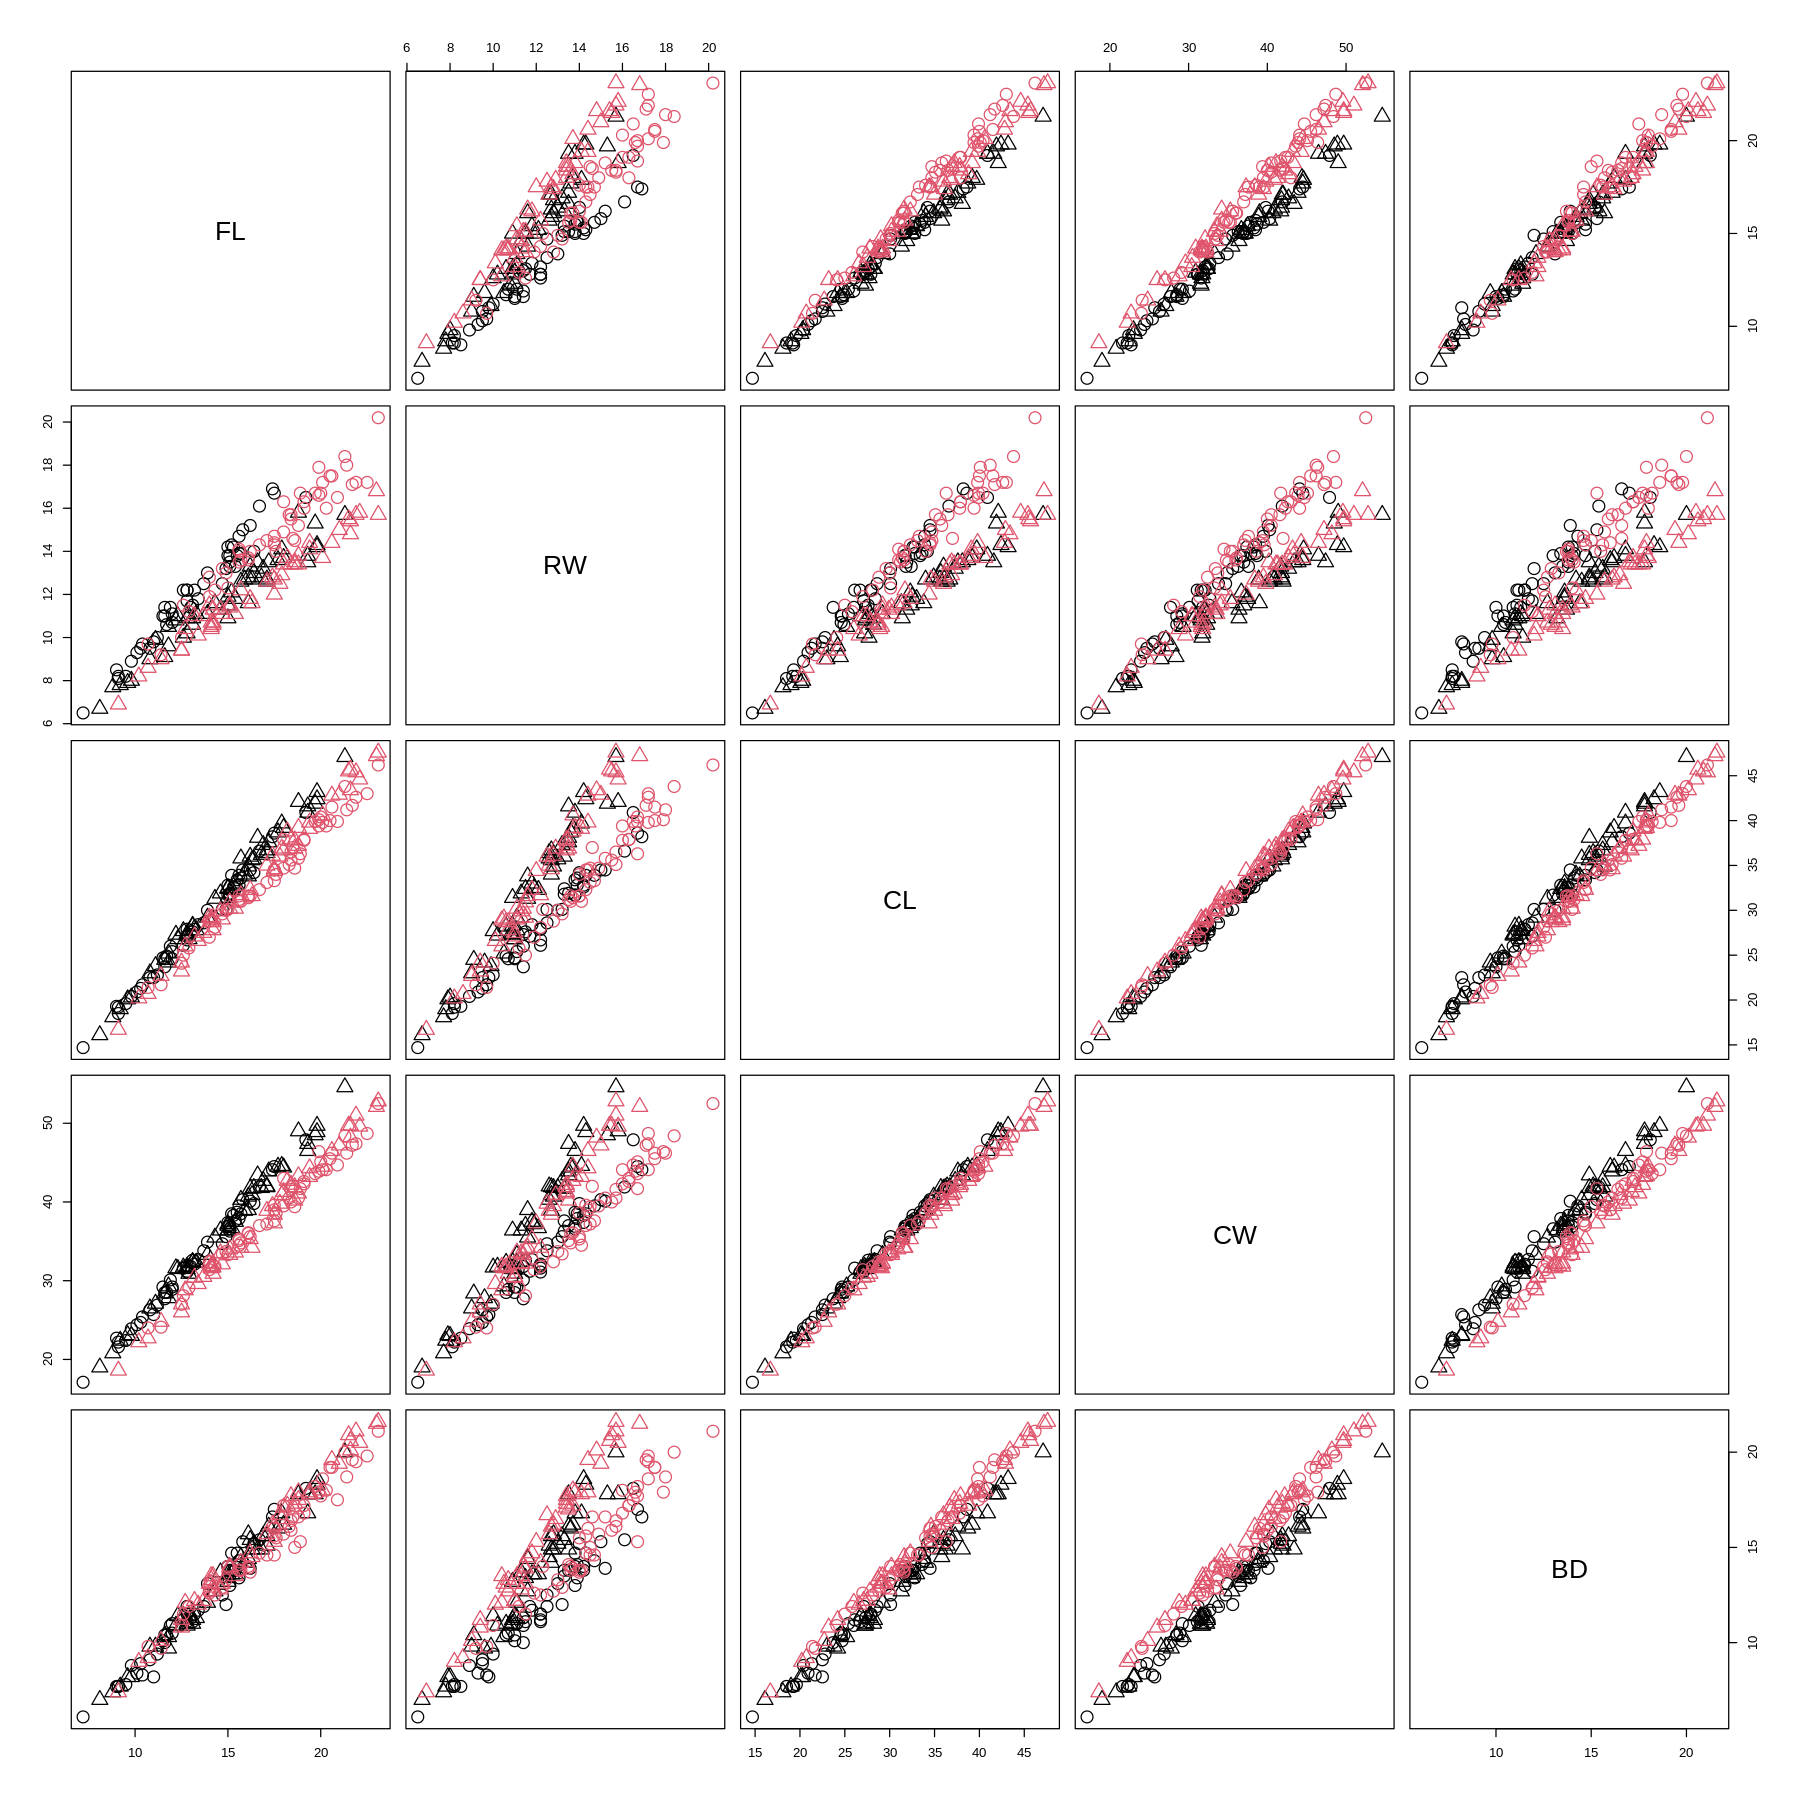

In [223]:
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]), cex = 2)

### Comentarios

Como se observa en el gráfico inicial, hay una notable superposición entre los datos en casi todas las variables. Sin embargo, algunas combinaciones permiten distinguir las muestras teniendo en cuenta la especie y el sexo. Por ejemplo, en RW (Rear Width of the shell) y CL (Carapace Length), se puede notar una diferencia entre el sexo de los cangrejos, mientras que en CW (Carapace Width) y BD (Body Depth) se observa una distinción entre las especies. Aunque se pueden ver diferencias en algunas combinaciones de variables, dado que al buscar los clusters no se observan las clases de las muestras, y debido a que estas diferencias se manifiestan en distintas combinaciones, probablemente no se logren buenos resultados para ambas variables (especie y sexo).

### K-Means

In [58]:
regular = kmeans(crabs[, 4:8], 2, iter.max = 10, nstart = 20)
log = kmeans(log(crabs[, 4:8]), 2, iter.max = 10, nstart = 20)
log_scale = kmeans(as.data.frame(scale(log(crabs[, 4:8]))), 2, iter.max = 10, nstart = 20)
log_scale_pca = kmeans(as.data.frame(prcomp(scale(log(crabs[, 4:8])))$x), 2, iter.max = 10, nstart = 20)
log_pca_scale = kmeans(as.data.frame(scale(prcomp(log(crabs[, 4:8]))$x)), 2, iter.max = 10, nstart = 20)

#### Especie

Base

In [59]:
cont.table <- table(crabs[, 1],regular$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 59 %
   
     1  2
  B 61 39
  O 43 57


Log

In [60]:
cont.table <- table(crabs[, 1],log$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
   
     2  1
  B 48 52
  O 27 73


Log + Scale

In [61]:
cont.table <- table(crabs[, 1],log_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
   
     2  1
  B 48 52
  O 27 73


Log + Scale + PCA

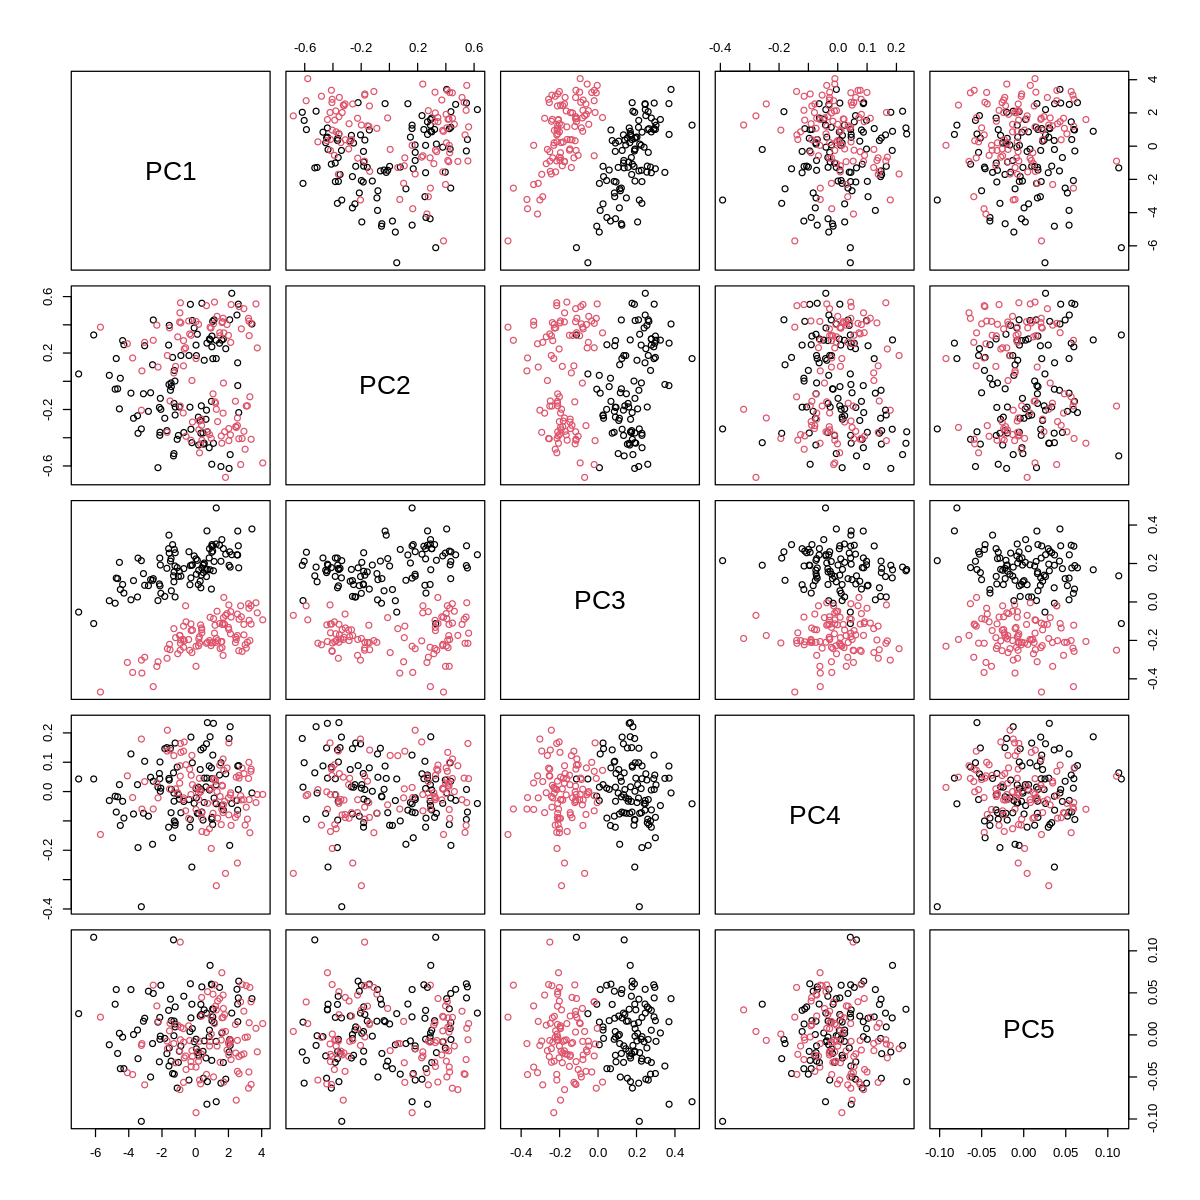

In [62]:
plot(as.data.frame(prcomp(scale(log(crabs[, 4:8])))$x),col=as.numeric(crabs[,1]))

In [63]:
cont.table <- table(crabs[, 1],log_scale_pca$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
   
     2  1
  B 48 52
  O 27 73


Log + PCA + Scale

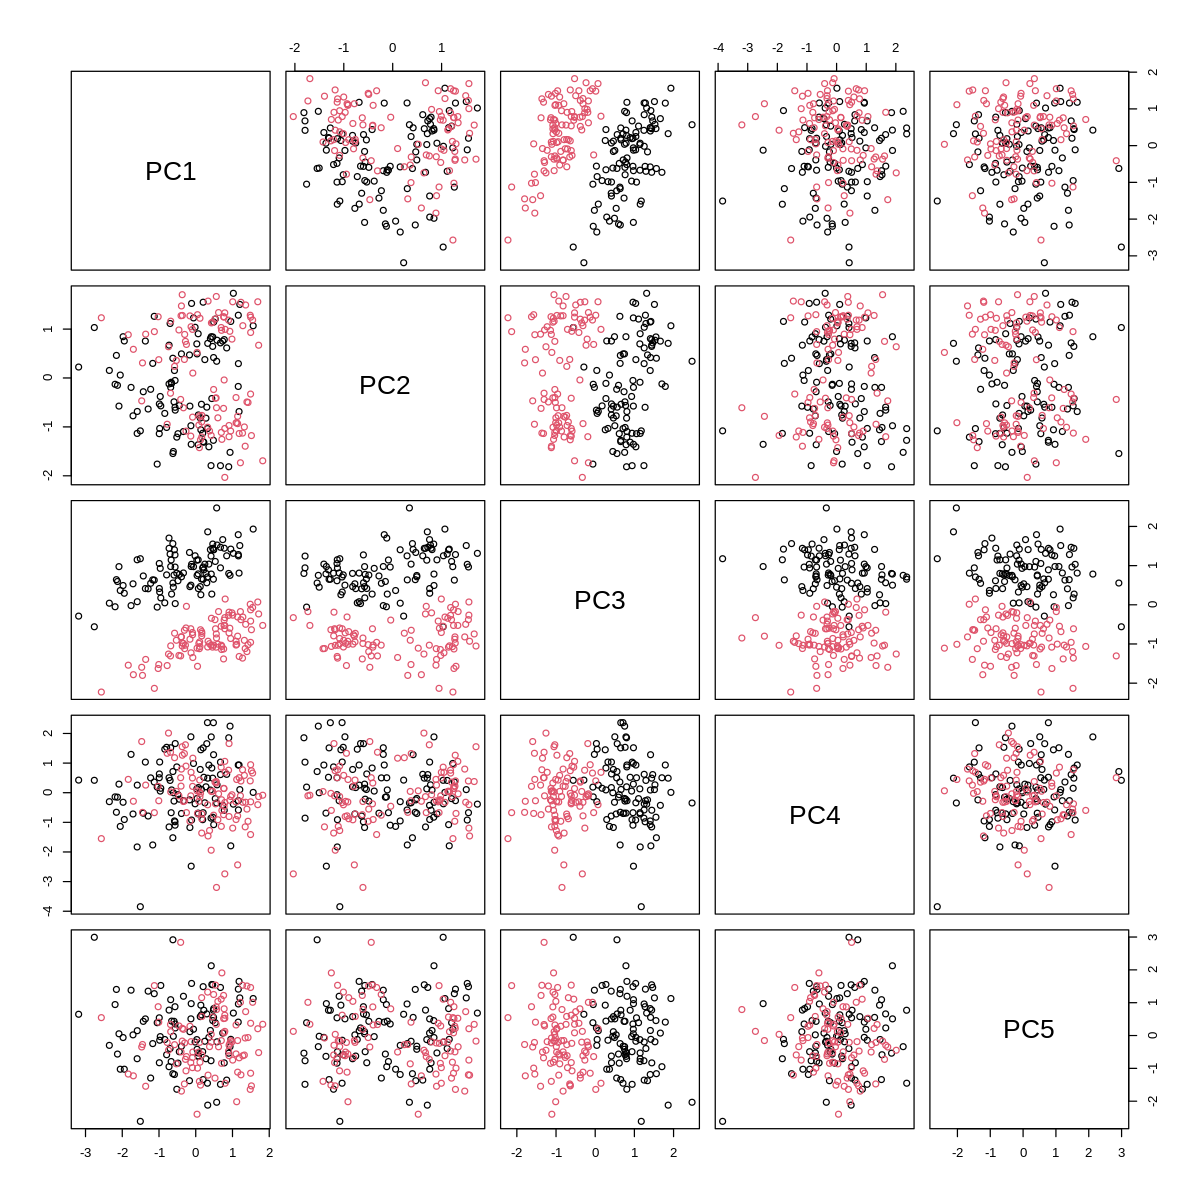

In [64]:
plot(as.data.frame(scale(prcomp(log(crabs[, 4:8]))$x)),col=as.numeric(crabs[,1]))

In [65]:
cont.table <- table(crabs[, 1],log_pca_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 100 %
   
      1   2
  B 100   0
  O   0 100


#### Sexo

Base

In [66]:
cont.table <- table(crabs[, 2],regular$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51 %
   
     1  2
  F 53 47
  M 51 49


Log

In [67]:
cont.table <- table(crabs[, 2],log$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
   
     1  2
  F 64 36
  M 61 39


Log + Scale

In [68]:
cont.table <- table(crabs[, 2],log_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
   
     1  2
  F 64 36
  M 61 39


Log + Scale + PCA

In [69]:
cont.table <- table(crabs[, 2],log_scale_pca$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
   
     1  2
  F 64 36
  M 61 39


Log + PCA + Scale

In [70]:
cont.table <- table(crabs[, 2],log_pca_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50 %
   
     1  2
  F 50 50
  M 50 50


#### Comentarios
En el caso de la especie, casi todas las variaciones lograron la misma predicción que la Base, salvo Log + PCA + Scale, que consiguió un 100%. En el caso de sexo, no comentaré nada ya que ninguna consiguió superar el 51%.


### Dendograma Average

In [103]:
regular = hclust(dist(crabs[, 4:8], method = "euclidean"), method = "average")
log = hclust(dist(log(crabs[, 4:8]), method = "euclidean"), method = "average")
log_scale = hclust(dist(as.data.frame(scale(log(crabs[, 4:8]))), method = "euclidean"), method = "average")
log_scale_pca = hclust(dist(as.data.frame(prcomp(scale(log(crabs[, 4:8])))$x), method = "euclidean"), method = "average")
log_pca_scale = hclust(dist(as.data.frame(scale(prcomp(log(crabs[, 4:8]))$x)), method = "euclidean"), method = "average")

#### Especie

Base

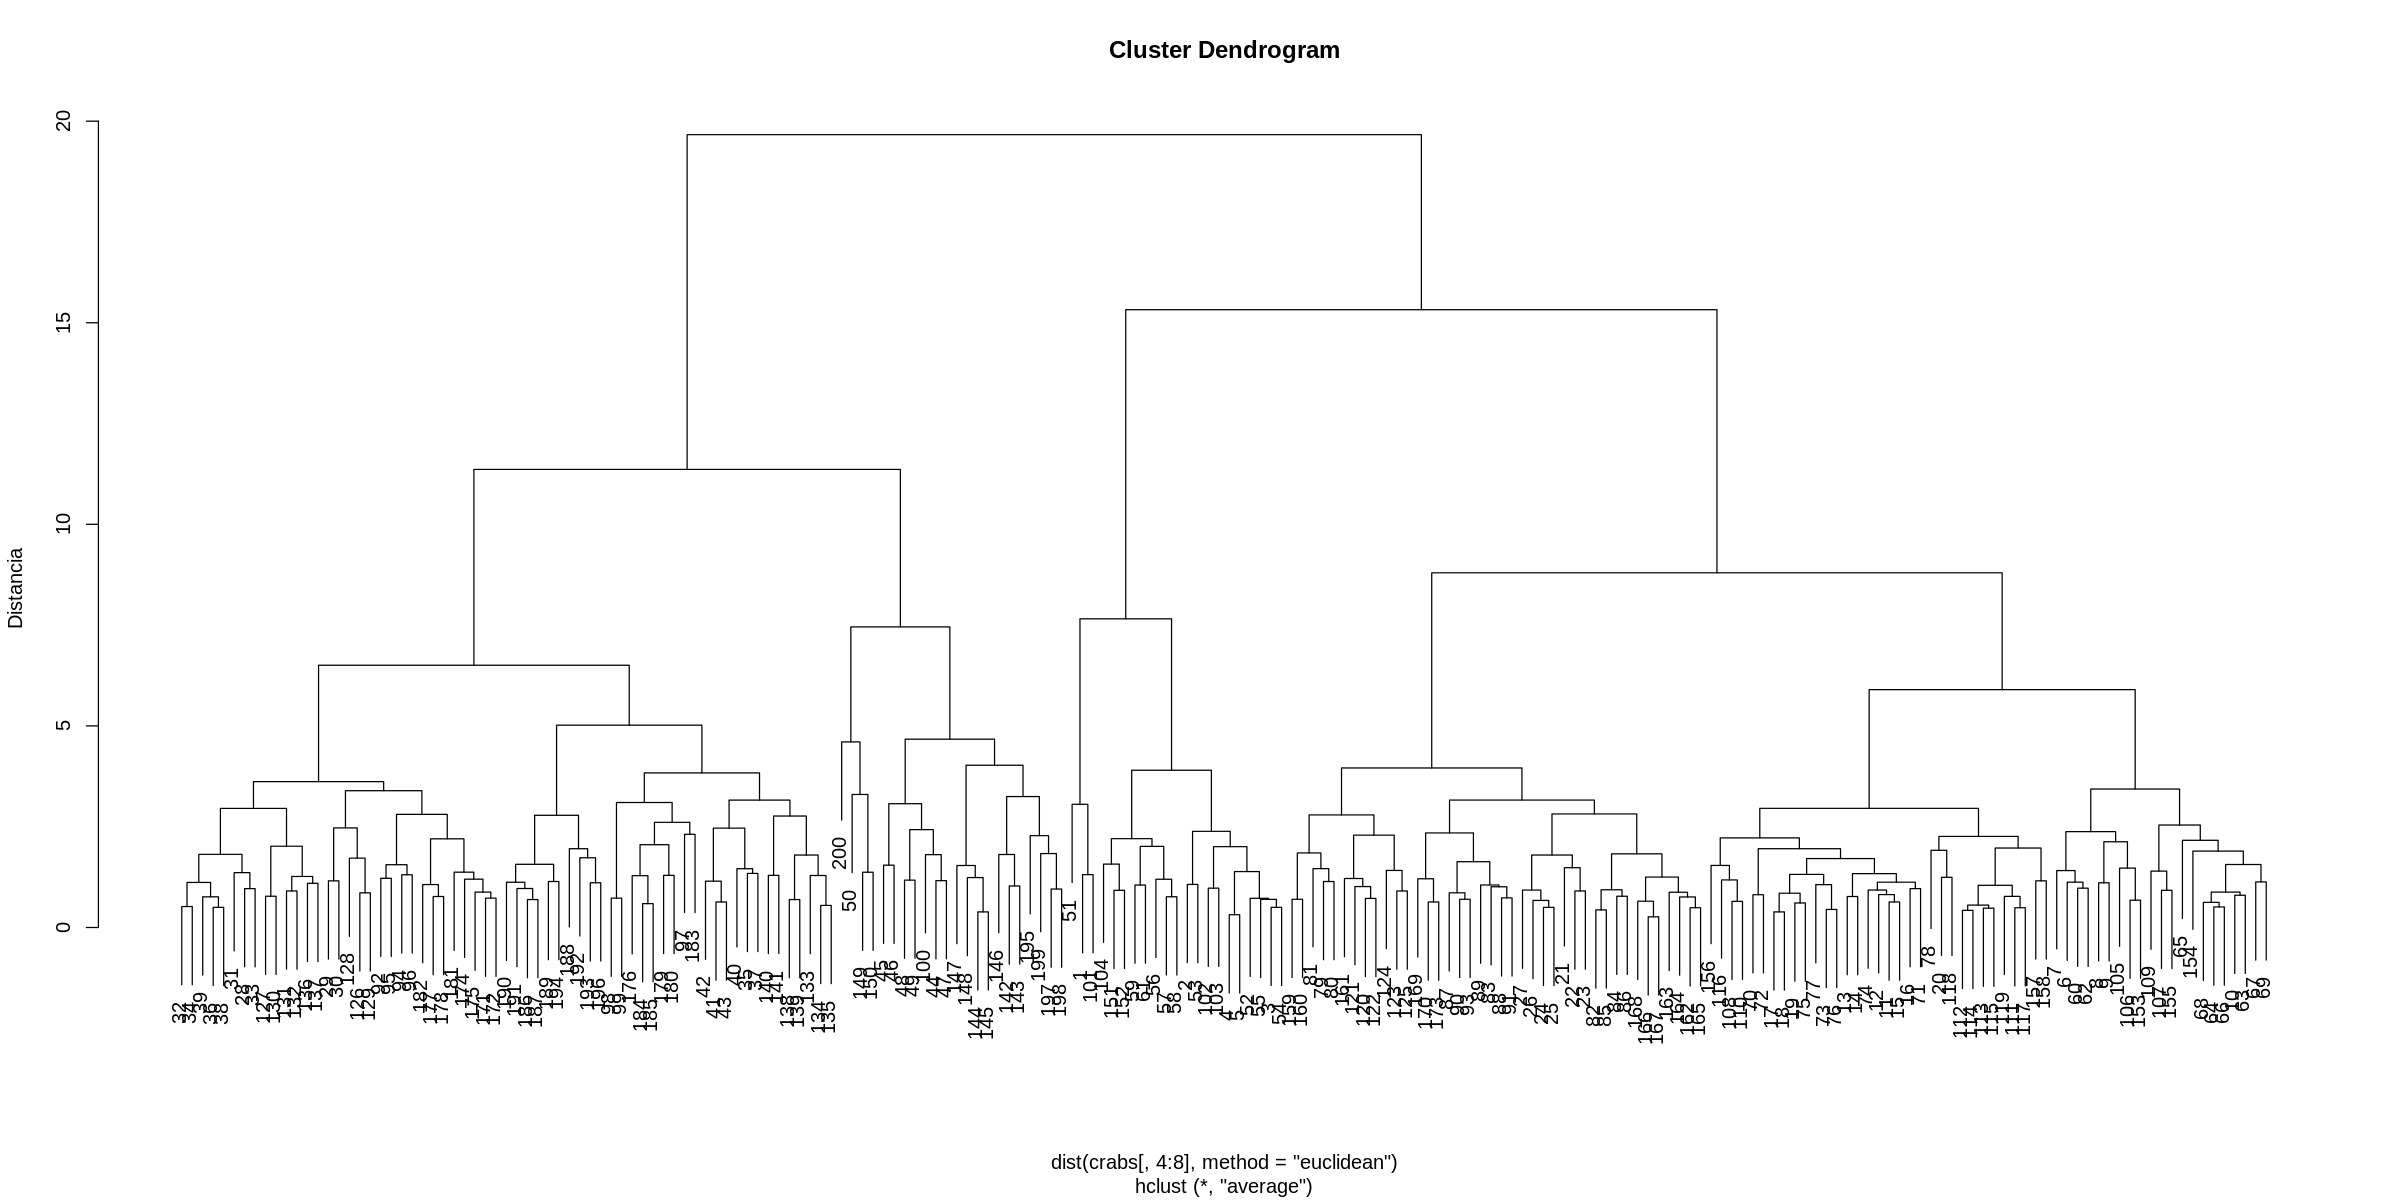

In [116]:
plot(regular, ylab = "Distancia")

In [105]:
cont.table <- table(crabs[, 1],cutree(regular,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 61.5 %
   
     1  2
  B 69 31
  O 46 54


Log

In [106]:
cont.table <- table(crabs[, 1],cutree(log,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 57 %
   
     1  2
  B 20 80
  O  6 94


Log + Scale

In [107]:
cont.table <- table(crabs[, 1],cutree(log_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
   
     1  2
  B  2 98
  O  1 99


Log + Scale + PCA

In [108]:
cont.table <- table(crabs[, 1],cutree(log_scale_pca,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
   
     1  2
  B  2 98
  O  1 99


Log + PCA + Scale

In [109]:
cont.table <- table(crabs[, 1],cutree(log_pca_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 50.5 %
   
      2   1
  B   1  99
  O   0 100


#### Sexo

Base

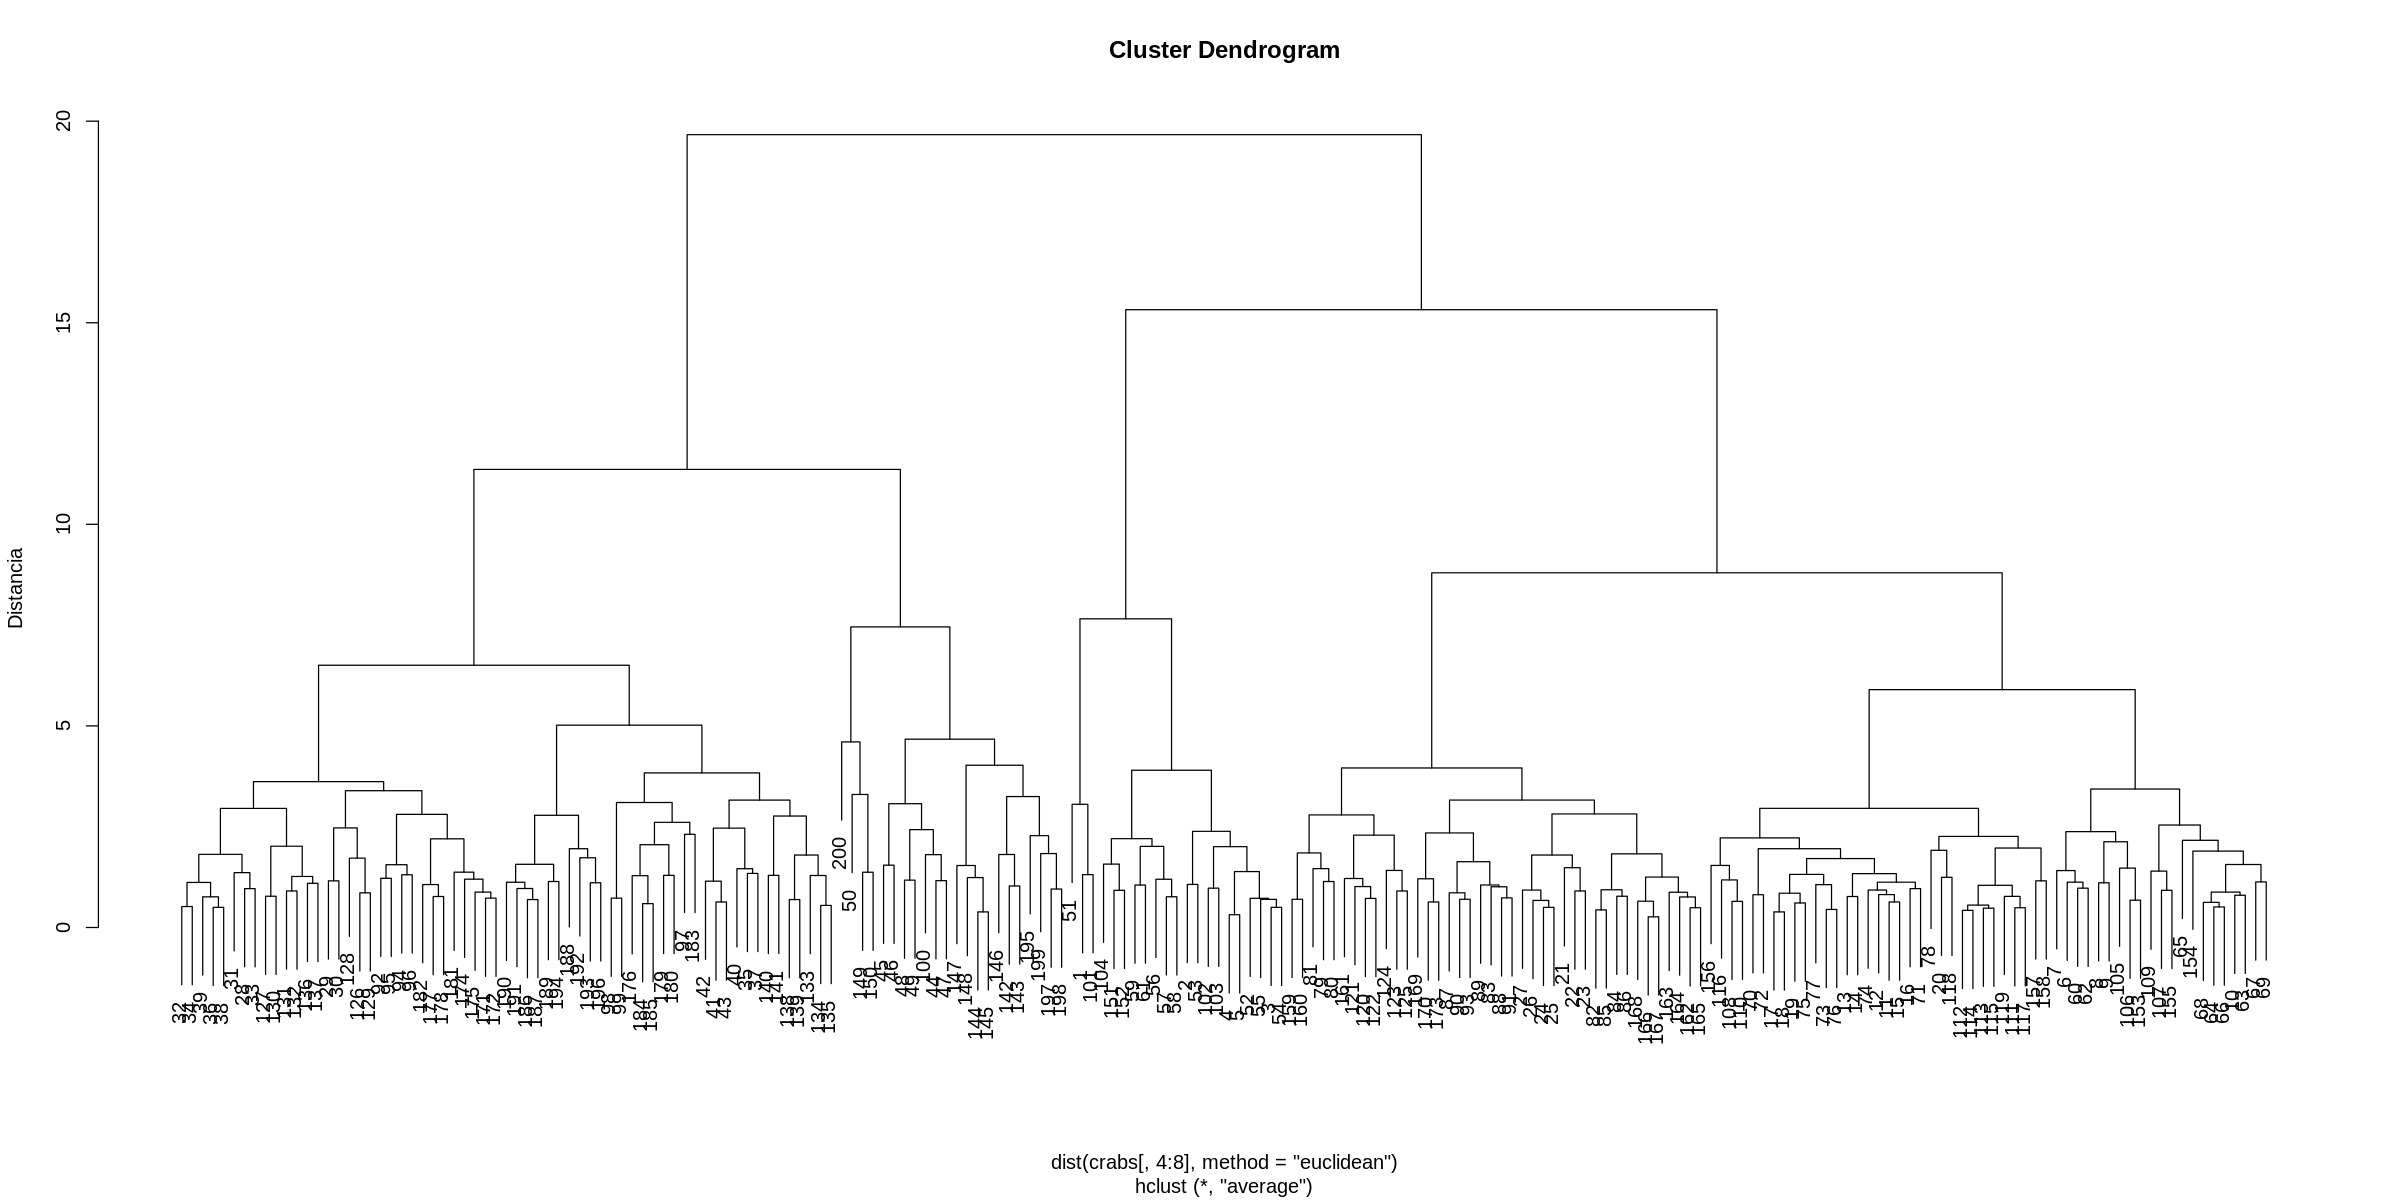

In [110]:
plot(regular, ylab = "Distancia")

In [111]:
cont.table <- table(crabs[, 2],cutree(regular,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.5 %
   
     1  2
  F 63 37
  M 52 48


Log

In [112]:
cont.table <- table(crabs[, 2],cutree(log,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51 %
   
     1  2
  F 14 86
  M 12 88


Log + Scale

In [113]:
cont.table <- table(crabs[, 2],cutree(log_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
   
     2  1
  F 99  1
  M 98  2


Log + Scale + PCA

In [114]:
cont.table <- table(crabs[, 2],cutree(log_scale_pca,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
   
     2  1
  F 99  1
  M 98  2


Log + PCA + Scale

In [115]:
cont.table <- table(crabs[, 2],cutree(log_pca_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 50.5 %
   
      2   1
  F   1  99
  M   0 100


### Dendograma Complete

In [126]:
regular = hclust(dist(crabs[, 4:8], method = "euclidean"), method = "complete")
log = hclust(dist(log(crabs[, 4:8]), method = "euclidean"), method = "complete")
log_scale = hclust(dist(as.data.frame(scale(log(crabs[, 4:8]))), method = "euclidean"), method = "complete")
log_scale_pca = hclust(dist(as.data.frame(prcomp(scale(log(crabs[, 4:8])))$x), method = "euclidean"), method = "complete")
log_pca_scale = hclust(dist(as.data.frame(scale(prcomp(log(crabs[, 4:8]))$x)), method = "euclidean"), method = "complete")

#### Especie

Base

In [127]:
cont.table <- table(crabs[, 1],cutree(regular,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 59.5 %
   
     1  2
  B 62 38
  O 43 57


Log

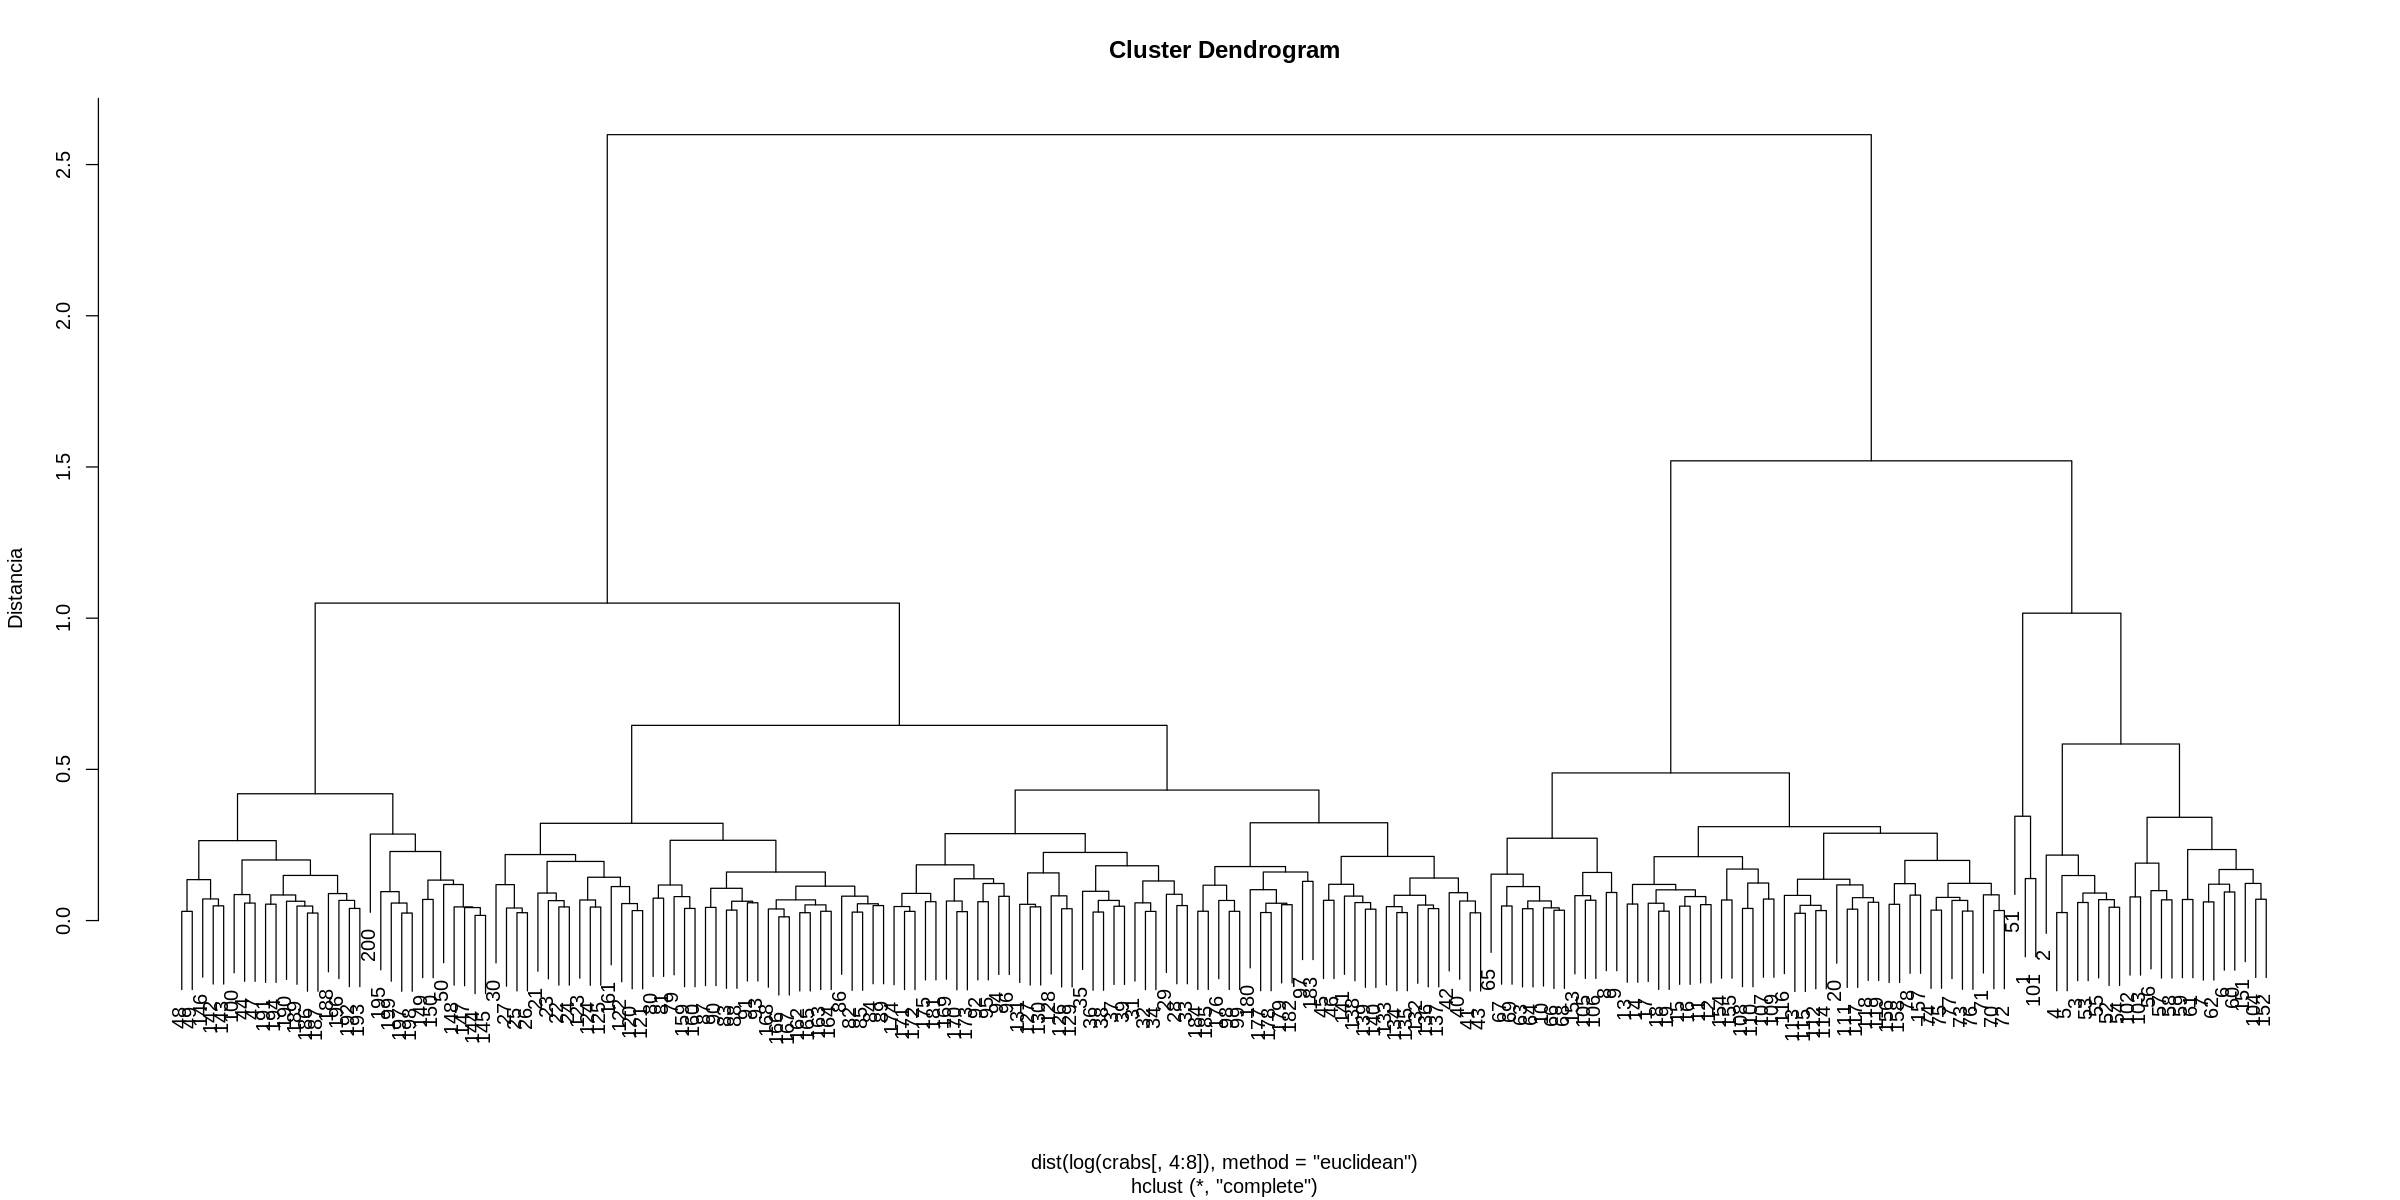

In [128]:
plot(log, ylab = "Distancia")

In [129]:
cont.table <- table(crabs[, 1],cutree(log,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
   
     1  2
  B 48 52
  O 27 73


Log + Scale

In [130]:
cont.table <- table(crabs[, 1],cutree(log_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
   
     1  2
  B 48 52
  O 27 73


Log + Scale + PCA

In [131]:
cont.table <- table(crabs[, 1],cutree(log_scale_pca,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
   
     1  2
  B 48 52
  O 27 73


Log + PCA + Scale

In [132]:
cont.table <- table(crabs[, 1],cutree(log_pca_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 53.5 %
   
     1  2
  B 97  3
  O 90 10


#### Sexo

Base

In [133]:
cont.table <- table(crabs[, 2],cutree(regular,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
   
     1  2
  F 53 47
  M 52 48


Log

In [134]:
cont.table <- table(crabs[, 2],cutree(log,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
   
     2  1
  F 64 36
  M 61 39


Log + Scale

In [135]:
cont.table <- table(crabs[, 2],cutree(log_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
   
     2  1
  F 64 36
  M 61 39


Log + Scale + PCA

In [136]:
cont.table <- table(crabs[, 2],cutree(log_scale_pca,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
   
     2  1
  F 64 36
  M 61 39


Log + PCA + Scale

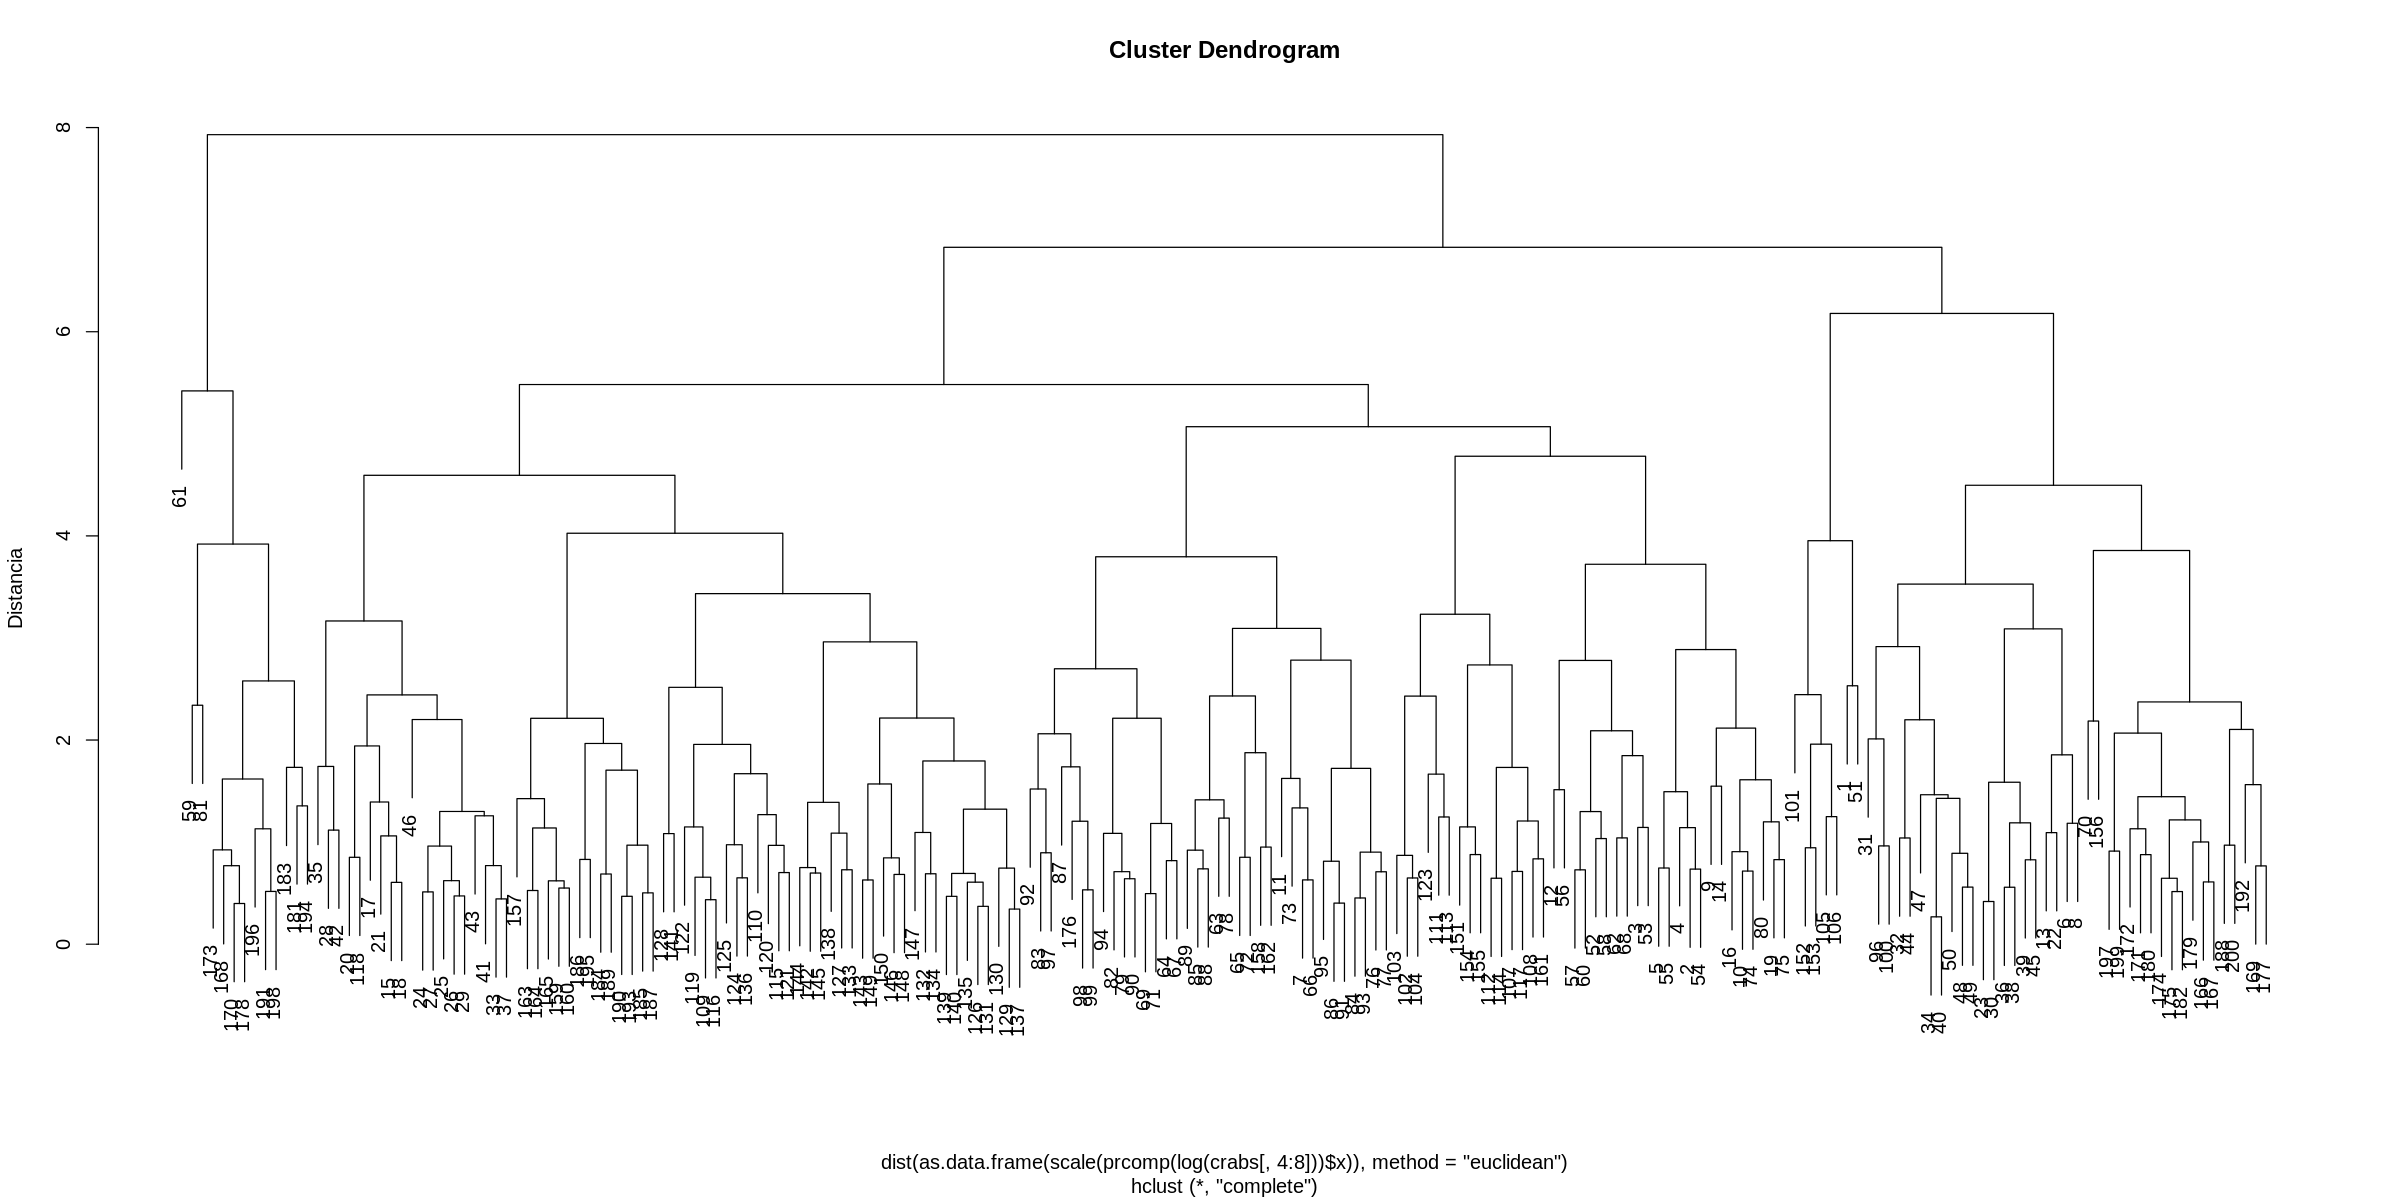

In [137]:
plot(log_pca_scale, ylab = "Distancia")

In [138]:
cont.table <- table(crabs[, 2],cutree(log_pca_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 56.5 %
   
      2   1
  F  13  87
  M   0 100


### Comentarios

A partir de los resultados, parece mantenerse lo que comenté anteriormente. Al generar los clusters, parece haberse encontrado siempre mejores predicciones para Especie que para Sexo. Esto es mucho más notorio utilizando K-Means, donde se consigue un 100% de acierto para Especie y un 51% para Sexo. De hecho, el mejor resultado para Sexo se consiguió en el dendograma Average, con un 55%, mientras que en Especie se alcanzó un 60% de coincidencia con los resultados reales.

Tantos los resultados de Average como de Complete no fueron satisfactorios, ademas de dar ambos resultados bastante parecidos.

## Lampone

In [193]:
load("lampone.Rdata")

In [194]:
data <- lampone[, -c(1, 143, ncol(lampone))]

data <- data[, -which(sapply(data, var) == 0), drop = FALSE]

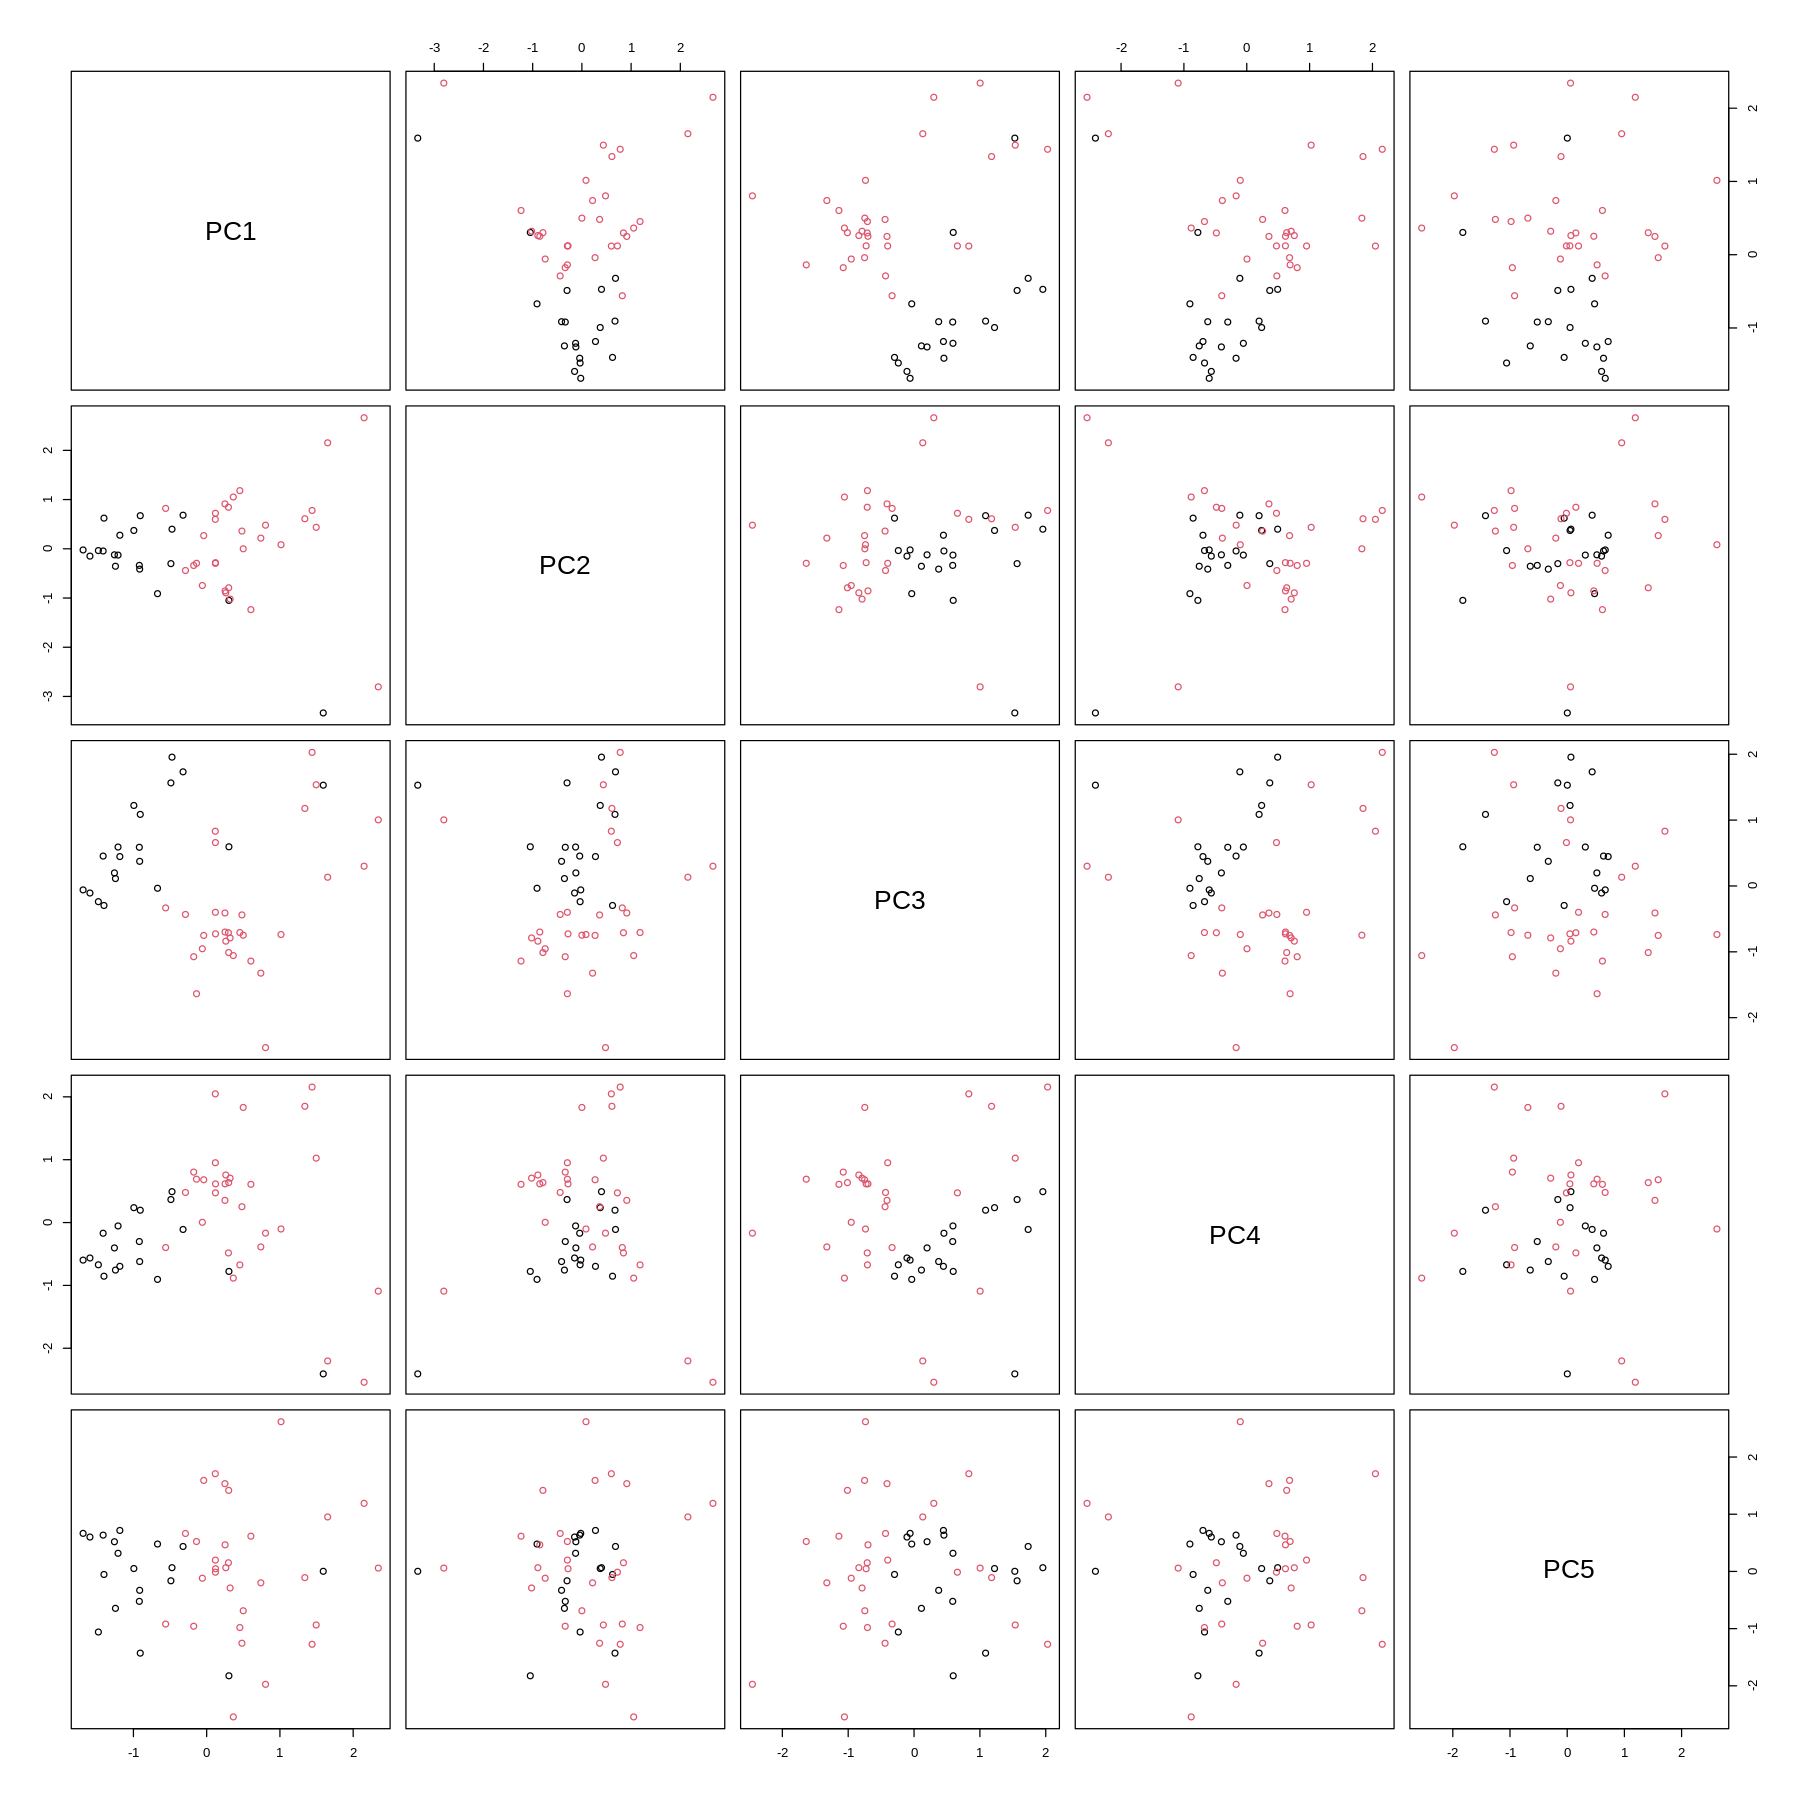

In [197]:
pairs(as.data.frame(scale(prcomp(data)$x[,1:5])),col=lampone[, 1])

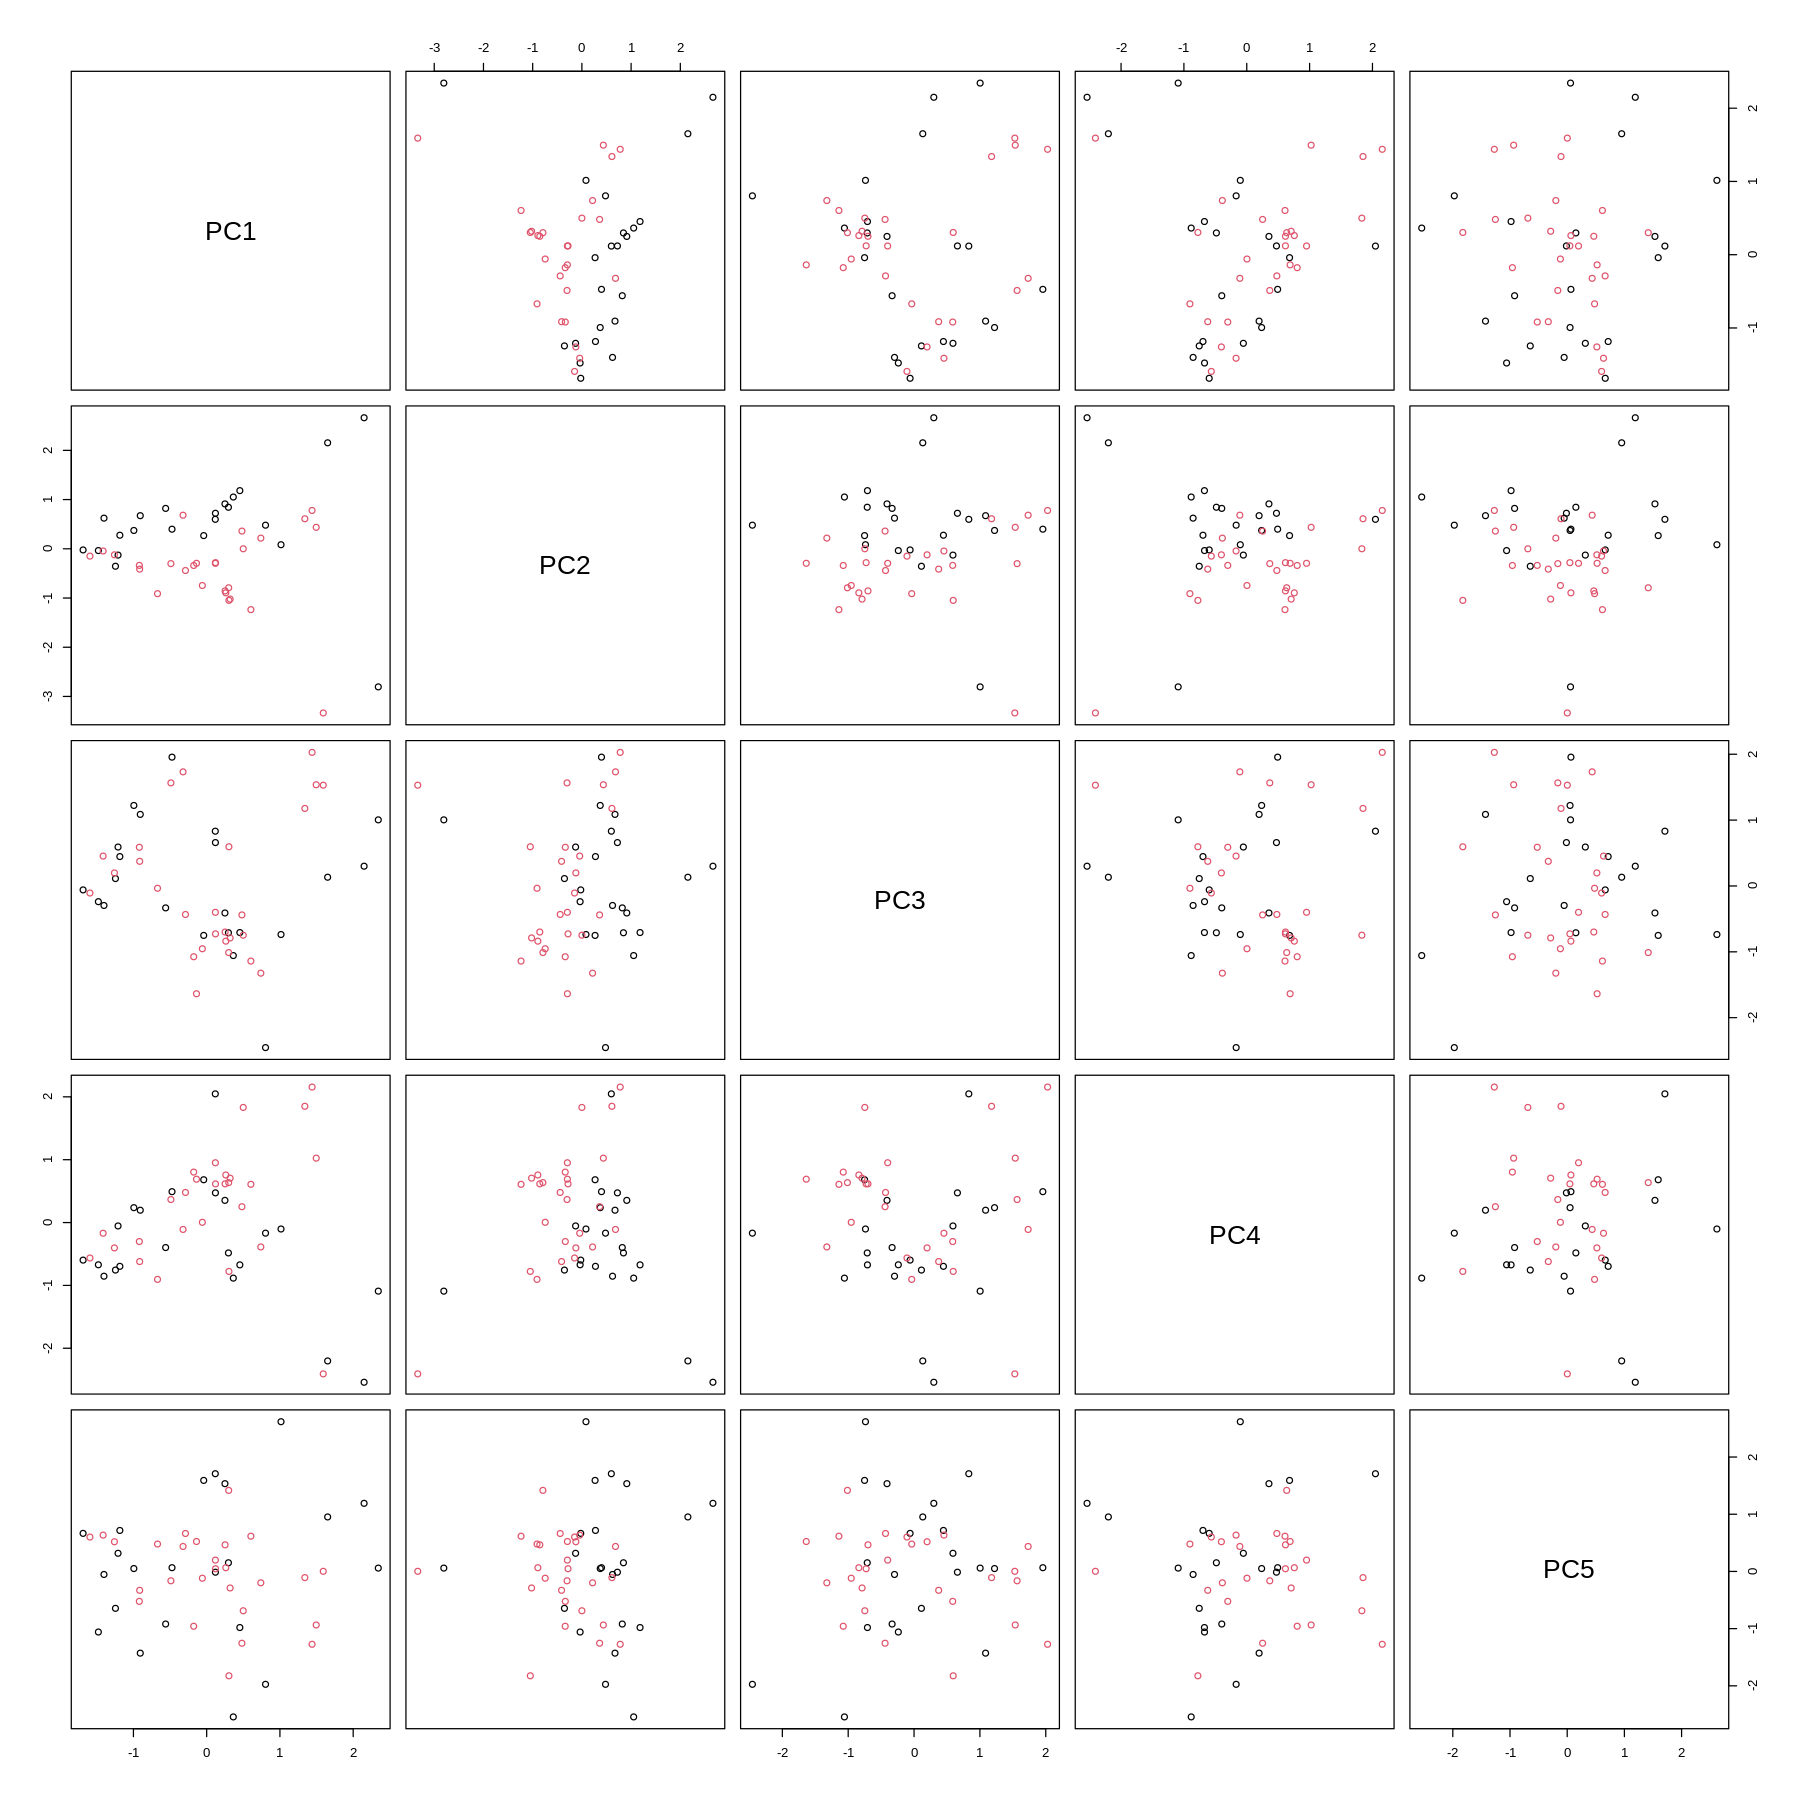

In [198]:
pairs(as.data.frame(scale(prcomp(data)$x[,1:5])),col=lampone[, 143])

### K-Means

In [146]:
regular = kmeans(data, 2, iter.max = 10, nstart = 20)
log = kmeans(log(data + 1), 2, iter.max = 10, nstart = 20)
log_scale = kmeans(as.data.frame(scale(log(data + 1))), 2, iter.max = 10, nstart = 20)
log_scale_pca = kmeans(as.data.frame(prcomp(scale(log(data + 1)))$x), 2, iter.max = 10, nstart = 20)
log_pca_scale = kmeans(as.data.frame(scale(prcomp(log(data + 1))$x)), 2, iter.max = 10, nstart = 20)

#### Año

Base

In [147]:
cont.table <- table(lampone[, 1],regular$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
      
        1  2
  2006 17  2
  2007  2 28


Log

In [148]:
cont.table <- table(lampone[, 1],log$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 100 %
      
        1  2
  2006 19  0
  2007  0 30


Log + Scale

In [149]:
cont.table <- table(lampone[, 1],log_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 97.96 %
      
        2  1
  2006 19  0
  2007  1 29


Log + Scale + PCA

In [150]:
cont.table <- table(lampone[, 1],log_scale_pca$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 97.96 %
      
        2  1
  2006 19  0
  2007  1 29


Log + PCA + Scale

In [151]:
cont.table <- table(lampone[, 1],log_pca_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 75.51 %
      
        1  2
  2006 14  5
  2007  7 23


#### Especie Blueberry

Base

In [152]:
cont.table <- table(lampone[, 143],regular$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
    
      1  2
  2  10 12
  10  9 18


Log

In [153]:
cont.table <- table(lampone[, 143],log$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
    
      1  2
  2   9 13
  10 10 17


Log + Scale

In [154]:
cont.table <- table(lampone[, 143],log_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.1 %
    
      2  1
  2  10 12
  10 10 17


Log + Scale + PCA

In [155]:
cont.table <- table(lampone[, 143],log_scale_pca$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.1 %
    
      2  1
  2  10 12
  10 10 17


Log + PCA + Scale

In [156]:
cont.table <- table(lampone[, 143],log_pca_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 59.18 %
    
      2  1
  2  15  7
  10 13 14


### Dendograma Average

In [157]:
regular = hclust(dist(data, method = "euclidean"), method = "average")
log = hclust(dist(log(data + 1), method = "euclidean"), method = "average")
log_scale = hclust(dist(as.data.frame(scale(log(data + 1))), method = "euclidean"), method = "average")
log_scale_pca = hclust(dist(as.data.frame(prcomp(scale(log(data + 1)))$x), method = "euclidean"), method = "average")
log_pca_scale = hclust(dist(as.data.frame(scale(prcomp(log(data + 1))$x)), method = "euclidean"), method = "average")

#### Año

Base

In [158]:
cont.table <- table(lampone[, 1],cutree(regular,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 61.22 %
      
        2  1
  2006  1 18
  2007  1 29


Log

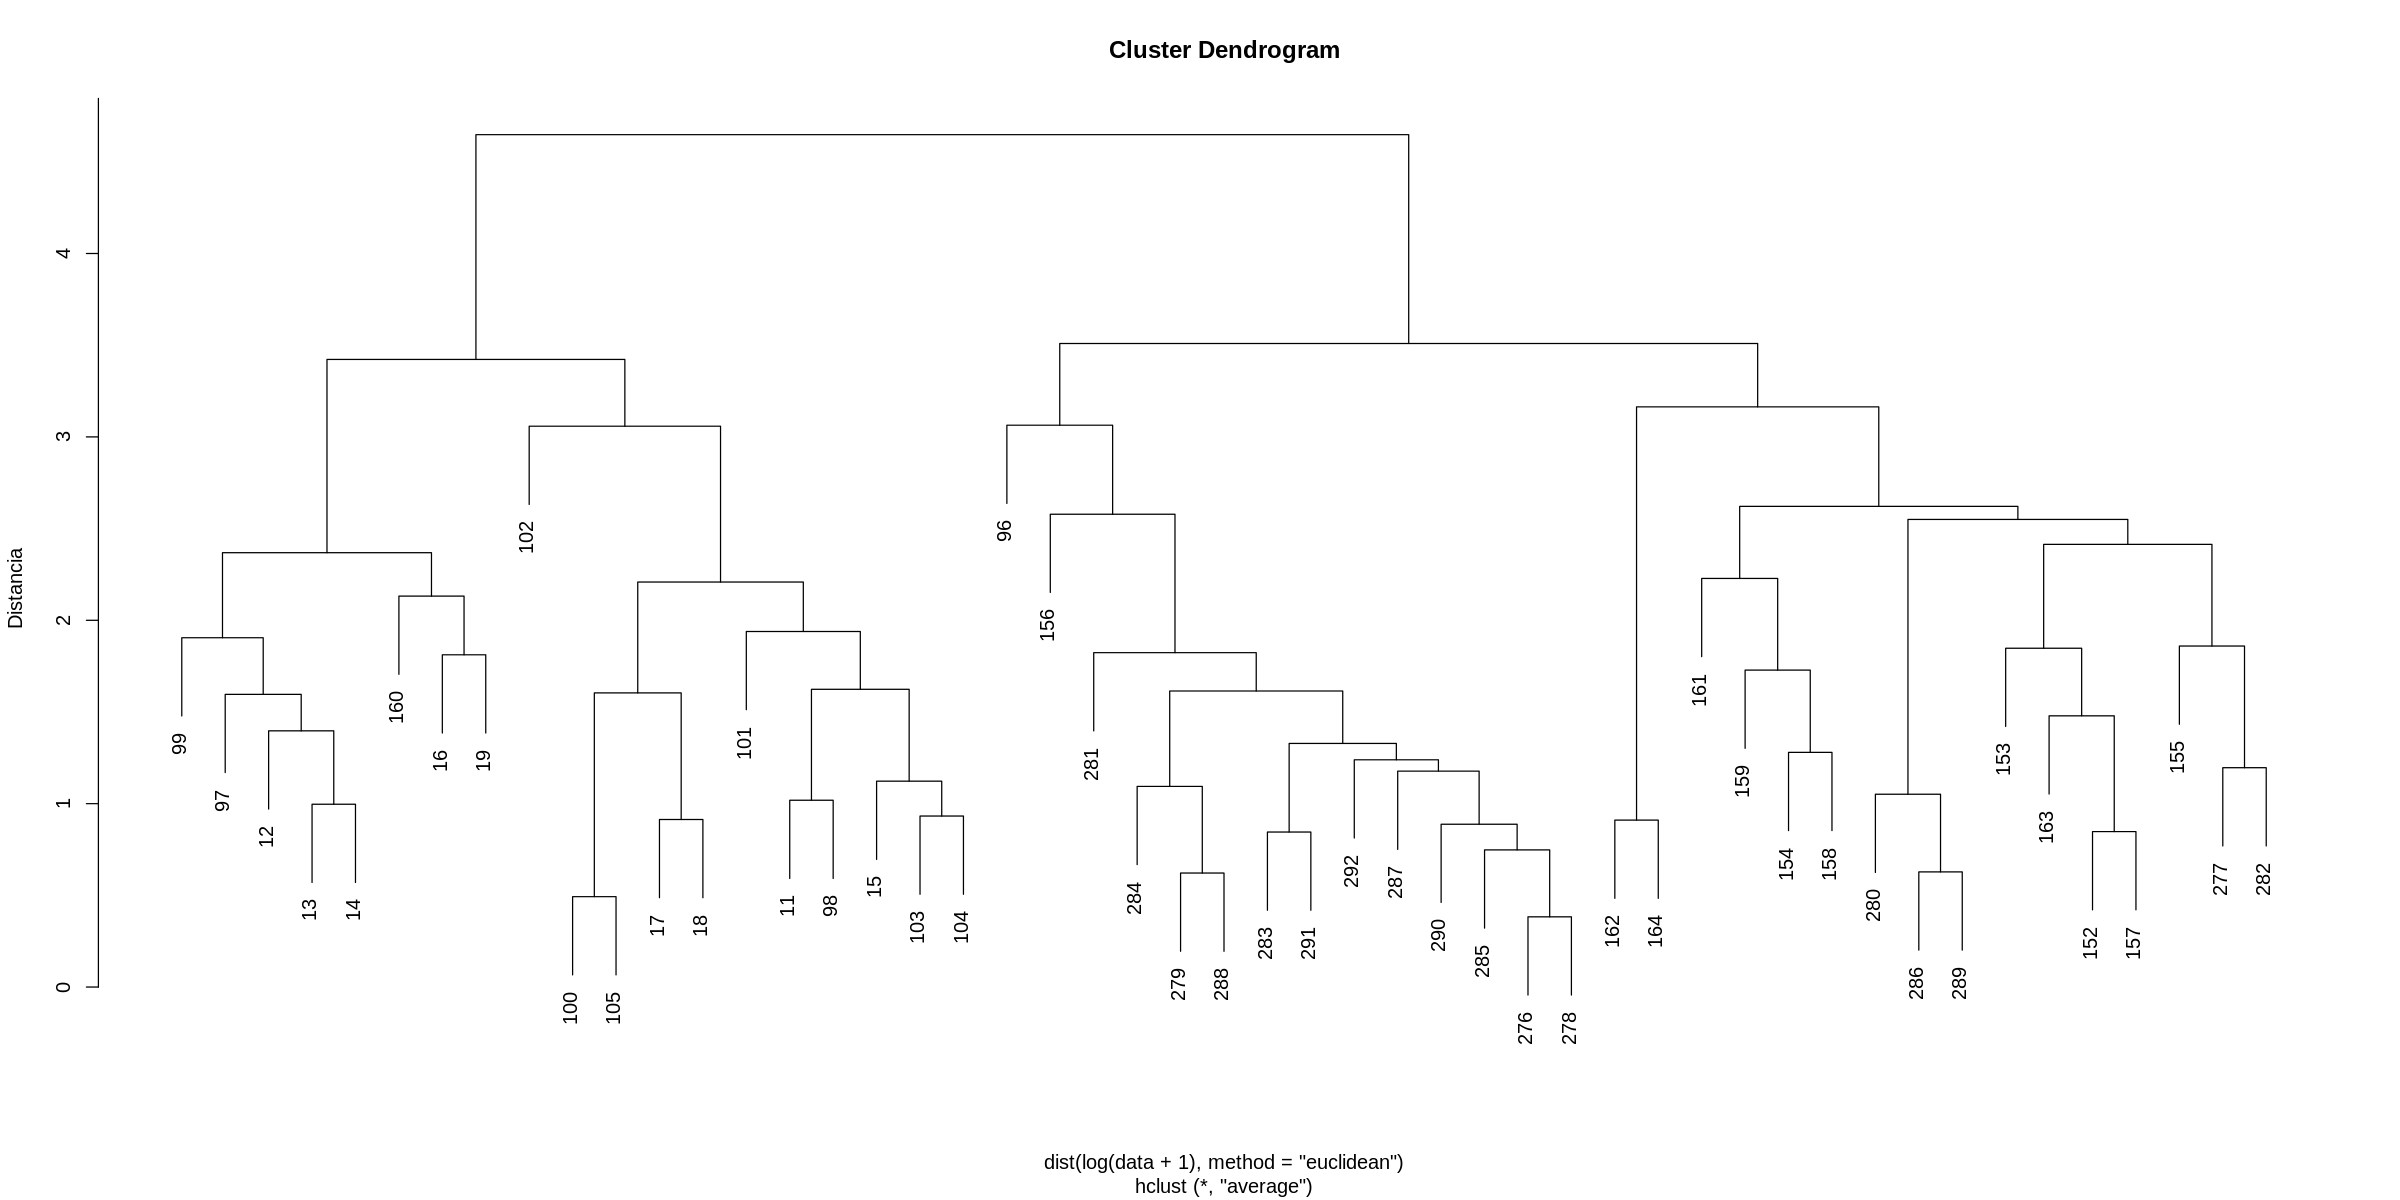

In [159]:
plot(log, ylab = "Distancia")

In [160]:
cont.table <- table(lampone[, 1],cutree(log,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 95.92 %
      
        1  2
  2006 18  1
  2007  1 29


Log + Scale

In [161]:
cont.table <- table(lampone[, 1],cutree(log_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 59.18 %
      
        2  1
  2006  0 19
  2007  1 29


Log + Scale + PCA

In [162]:
cont.table <- table(lampone[, 1],cutree(log_scale_pca,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 59.18 %
      
        2  1
  2006  0 19
  2007  1 29


Log + PCA + Scale

In [163]:
cont.table <- table(lampone[, 1],cutree(log_pca_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 59.18 %
      
        1  2
  2006 19  0
  2007 20 10


#### Especie Blueberry

In [164]:
regular = hclust(dist(data, method = "euclidean"), method = "average")
log = hclust(dist(log(data + 1), method = "euclidean"), method = "average")
log_scale = hclust(dist(as.data.frame(scale(log(data + 1))), method = "euclidean"), method = "average")
log_scale_pca = hclust(dist(as.data.frame(prcomp(scale(log(data + 1)))$x), method = "euclidean"), method = "average")
log_pca_scale = hclust(dist(as.data.frame(scale(prcomp(log(data + 1))$x)), method = "euclidean"), method = "average")

Base

In [165]:
cont.table <- table(lampone[, 143],cutree(regular,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 55.1 %
    
      2  1
  2   1 21
  10  1 26


Log

In [166]:
cont.table <- table(lampone[, 143],cutree(log,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
    
      1  2
  2  10 12
  10  9 18


Log + Scale

In [167]:
cont.table <- table(lampone[, 143],cutree(log_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 57.14 %
    
      2  1
  2   1 21
  10  0 27


Log + Scale + PCA

In [168]:
cont.table <- table(lampone[, 143],cutree(log_scale_pca,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 57.14 %
    
      2  1
  2   1 21
  10  0 27


Log + PCA + Scale

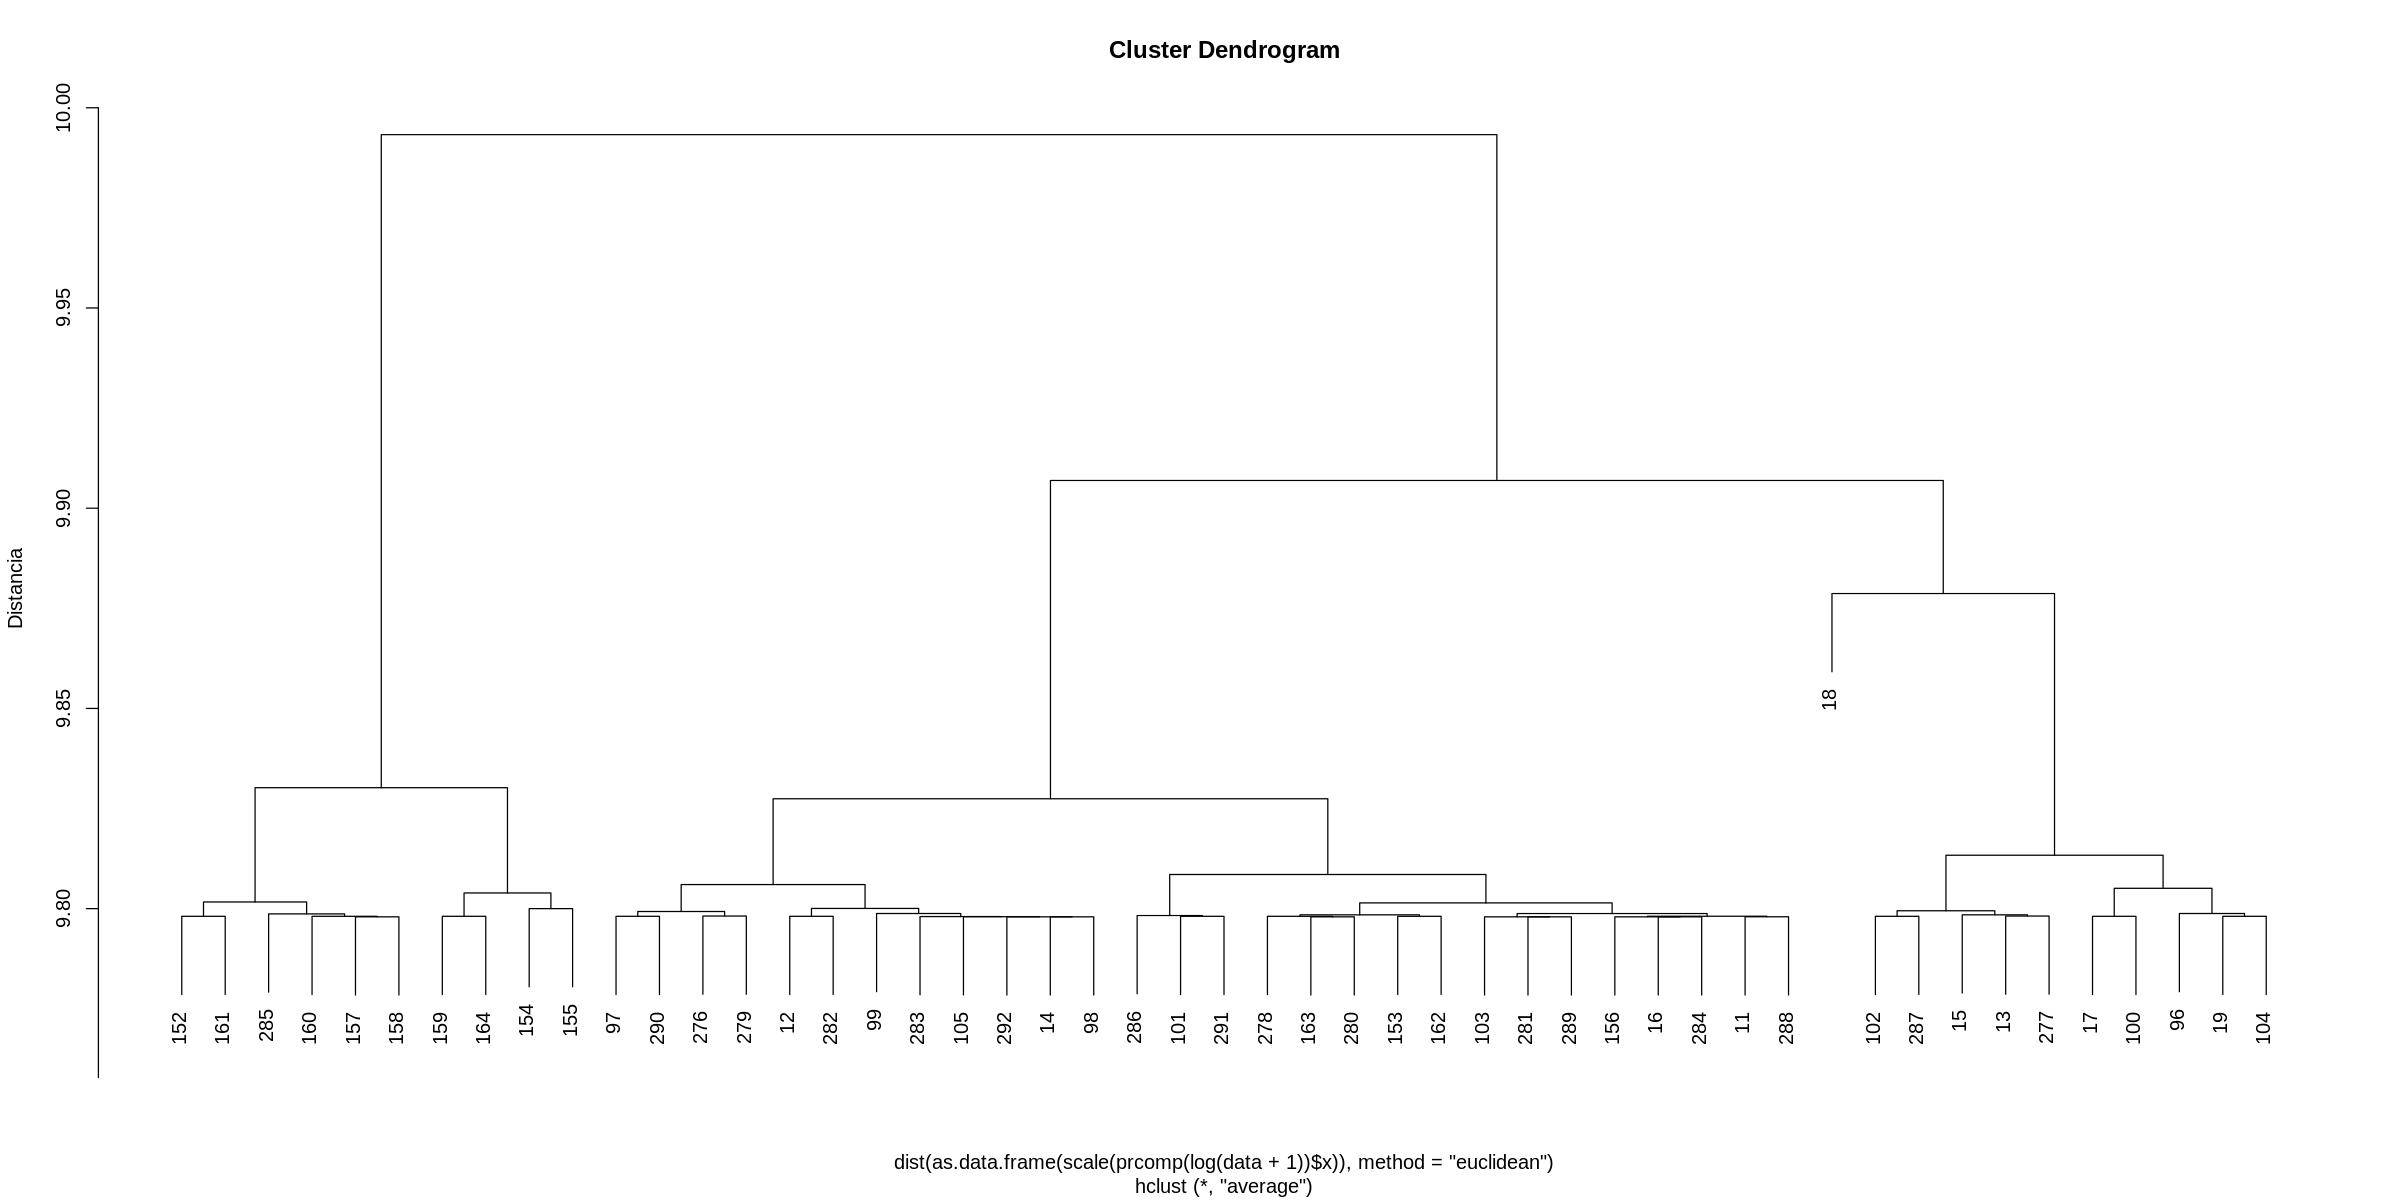

In [169]:
plot(log_pca_scale, ylab = "Distancia")

In [170]:
cont.table <- table(lampone[, 143],cutree(log_pca_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 71.43 %
    
      2  1
  2   9 13
  10  1 26


### Dendograma Complete

In [171]:
regular = hclust(dist(data, method = "euclidean"), method = "complete")
log = hclust(dist(log(data + 1), method = "euclidean"), method = "complete")
log_scale = hclust(dist(as.data.frame(scale(log(data + 1))), method = "euclidean"), method = "complete")
log_scale_pca = hclust(dist(as.data.frame(prcomp(scale(log(data + 1)))$x), method = "euclidean"), method = "complete")
log_pca_scale = hclust(dist(as.data.frame(scale(prcomp(log(data + 1))$x)), method = "euclidean"), method = "complete")

#### Año

Base

In [172]:
cont.table <- table(lampone[, 1],cutree(regular,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.02 %
      
        2  1
  2006  1 18
  2007  6 24


Log

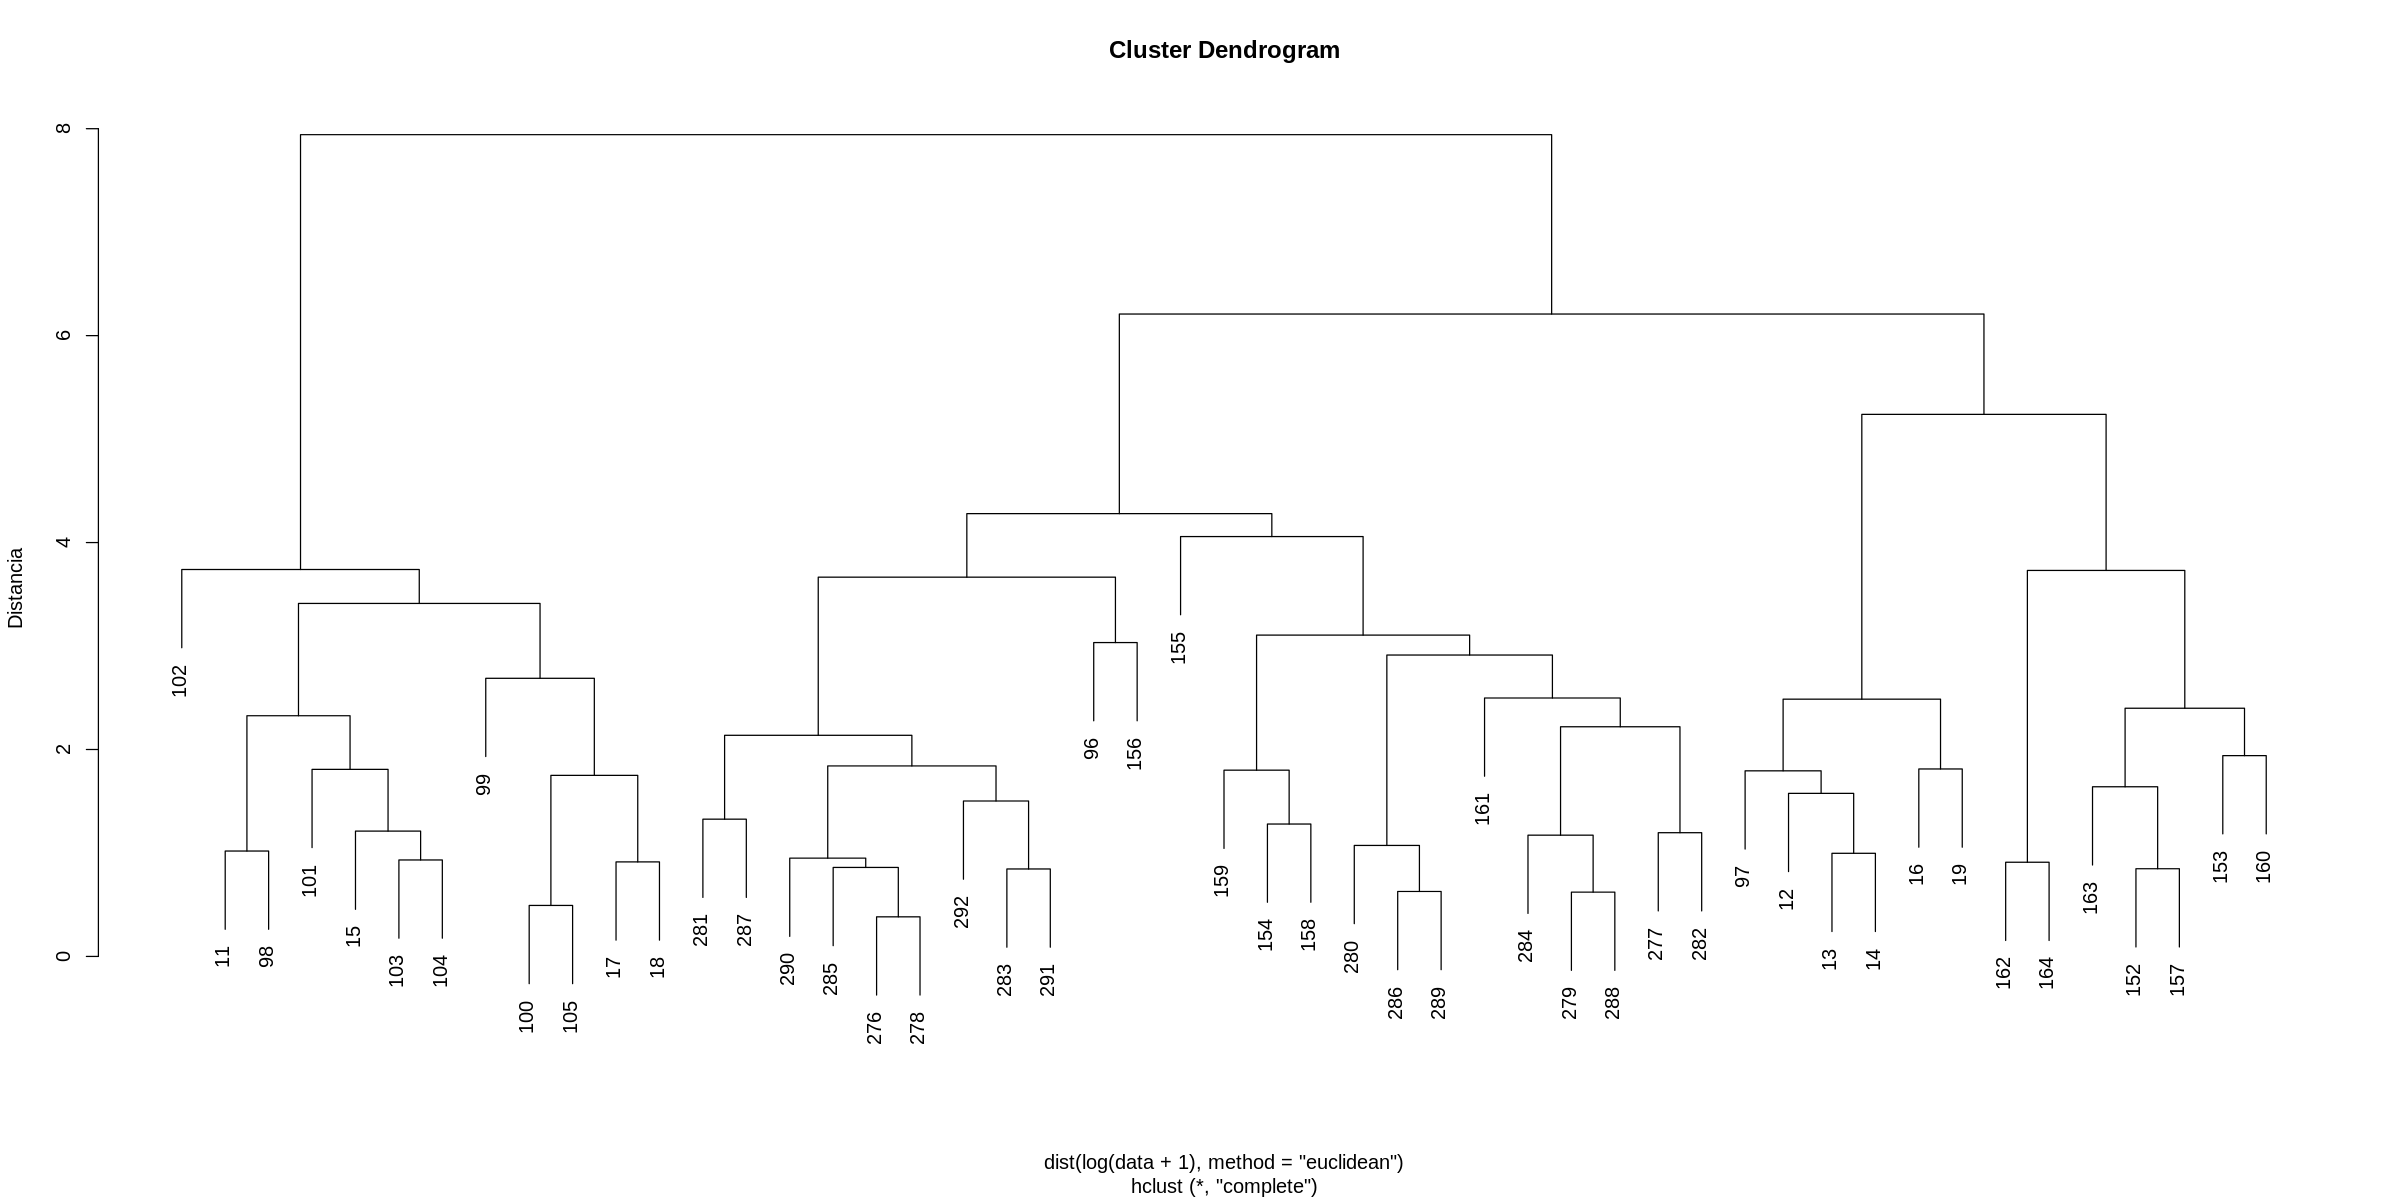

In [173]:
options(repr.plot.width = 20, repr.plot.height = 10)
plot(log, ylab = "Distancia")

In [174]:
cont.table <- table(lampone[, 1],cutree(log,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 85.71 %
      
        1  2
  2006 12  7
  2007  0 30


Log + Scale

In [175]:
cont.table <- table(lampone[, 1],cutree(log_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 83.67 %
      
        1  2
  2006 19  0
  2007  8 22


Log + Scale + PCA

In [176]:
cont.table <- table(lampone[, 1],cutree(log_scale_pca,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 83.67 %
      
        1  2
  2006 19  0
  2007  8 22


Log + PCA + Scale

In [177]:
cont.table <- table(lampone[, 1],cutree(log_pca_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 75.51 %
      
        2  1
  2006 10  9
  2007  3 27


#### Especie Blueberry

In [178]:
regular = hclust(dist(data, method = "euclidean"), method = "complete")
log = hclust(dist(log(data + 1), method = "euclidean"), method = "complete")
log_scale = hclust(dist(as.data.frame(scale(log(data + 1))), method = "euclidean"), method = "complete")
log_scale_pca = hclust(dist(as.data.frame(prcomp(scale(log(data + 1)))$x), method = "euclidean"), method = "complete")
log_pca_scale = hclust(dist(as.data.frame(scale(prcomp(log(data + 1))$x)), method = "euclidean"), method = "complete")

Base

In [179]:
cont.table <- table(lampone[, 143],cutree(regular,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
    
      2  1
  2   3 19
  10  4 23


Log

In [180]:
cont.table <- table(lampone[, 143],cutree(log,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
    
      2  1
  2  18  4
  10 19  8


Log + Scale

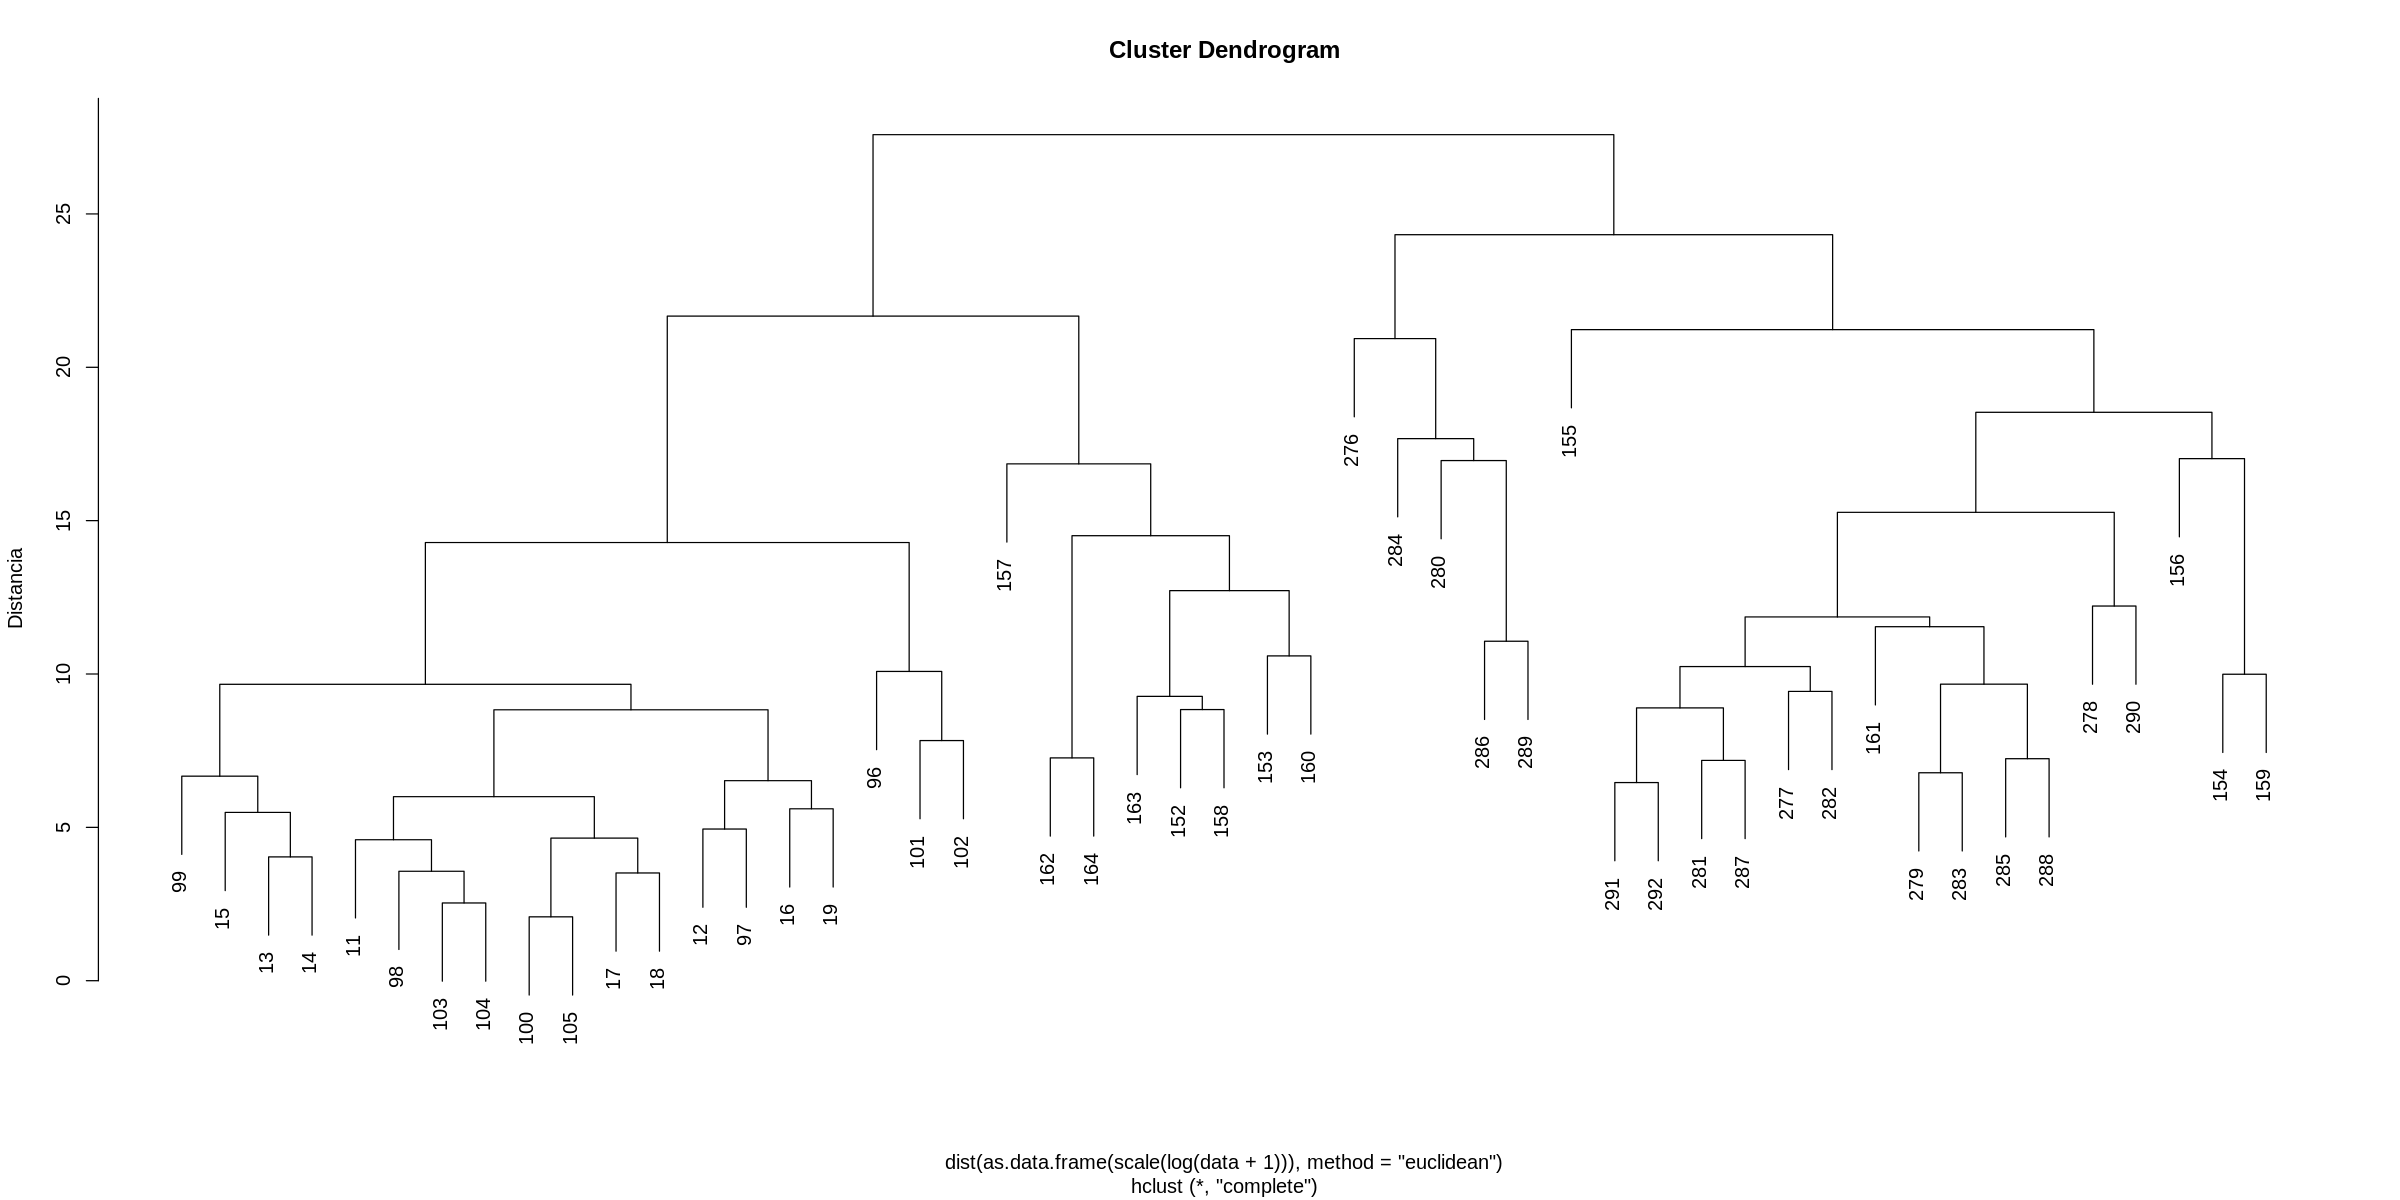

In [181]:
plot(log_scale, ylab = "Distancia")

In [182]:
cont.table <- table(lampone[, 143],cutree(log_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 69.39 %
    
      1  2
  2  17  5
  10 10 17


Log + Scale + PCA

In [183]:
cont.table <- table(lampone[, 143],cutree(log_scale_pca,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 69.39 %
    
      1  2
  2  17  5
  10 10 17


Log + PCA + Scale

In [184]:
cont.table <- table(lampone[, 143],cutree(log_pca_scale,k=2))
class.match <- matchClasses(as.matrix(cont.table),method="exact")
print(cont.table[,class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
    
      2  1
  2   6 16
  10  7 20


### Comentarios

Cabe aclarar que ploteé únicamente las primeras 5 PCAs (las cuales creo que son las 5 que mejor separan las muestras). Por lo que observo, estas parecen separar mejor los datos en cuanto al Año que en cuanto a la Especie Blueberry.

Según parece, al igual que en el apartado anterior, los clusters se generaron sobre muestras que tendían a dividirse más por Año que por Especie Blueberry. Esto se puede ver ya que en cada método se consiguieron mucho mejores predicciones para el primero, con resultados de accuracy de 100, 95 y 85, en los métodos respectivamente.

Algo a tener en cuenta es que, en algunos casos, parece haberse conseguido un buen cluster según el accuracy mostrado. Sin embargo, ocurre que en Año la cantidad de muestras en cada clase es muy dispareja, por lo que muchas veces los clusters están ubicados sobre casi todas las muestras, lo que resulta en valores de accuracy alrededor del 60%. Debido a esto, es importante analizar la precisión sobre cada clase para determinar si los clusters encontrados son realmente buenos.

# Ejercicio 2

## GAP

In [42]:
nReferences <- function(dataset, n) {
  rows <- nrow(dataset)
  cols <- ncol(dataset)

  pca <- prcomp(dataset)
  rangos <- apply(pca$x, 2, range)

  references <- list()

  for(i in 1:n){
    reference <- c()

    components <- min(ncol(pca$x), cols)

    for(j in 1:components) {
      uniformColumn = runif(rows, rangos[1, j], rangos[2, j])
      reference = cbind(reference, uniformColumn)
    }

    references[[i]] <- reference
  }

  return (references)
}

In [43]:
gapStatistic <- function(dataset, maxK, B) {
  wkb <- double(maxK)
  gap <- double(maxK)
  sk <- double(maxK)

  references <- nReferences(dataset, B)

  for(k in 2:maxK){
      wk <- kmeans(dataset, k)$tot.withinss

      for(b in 1:B){
          wkb[b] <- kmeans(references[[b]],k)$tot.withinss
      }

      gap[k] <- (1/B) * sum(log(wkb)) - log(wk)
      l <- (1/B) * sum(log(wkb))
      sd <- sqrt(1/B * sum((log(wkb) - l)^2))
      sk[k] <- sd * sqrt(1 + 1/B)
  }

  numClusters <- 2
  while(numClusters < maxK && gap[numClusters] < gap[numClusters + 1] - sk[numClusters + 1]) {
    numClusters = numClusters + 1
  }

  return (numClusters)
}

## Stability

In [44]:
stabilityScore <- function(n, ind1, ind2, cc1, cc2) {
  v1 <- v2 <- rep(0, n)
  v1[ind1] <- cc1 + 5
  v2[ind2] <- cc2 + 5

  a <- sqrt(v1%*%t(v1))
  m1 <- a / -a + 2 * (a == round(a))
  m1[is.nan(m1)] <- 0

  a <- sqrt(v2%*%t(v2))
  m2 <- a / -a + 2 * (a == round(a))
  m2[is.nan(m2)] <- 0

  validos <- sum(v1 * v2 > 0)
  return (sum((m1*m2)[upper.tri(m1)] > 0) / (validos * (validos - 1) / 2))
}

In [45]:
stability <- function(dataset, k, n, sampling){
  rows <- nrow(dataset)

  subsamples <- list()
  for(i in 1:n){
    subsamples[[i]] <- sample(rows, rows*sampling)
  }

  stabilityMean <- c()

  for(clusters in 2:k){
    kmeansSubsamples <- list()

    for(i in 1:n){
      kmeansSubsamples[[i]] <- kmeans(dataset[subsamples[[i]], ], clusters, nstart=20, iter.max=100)$cluster
    }

    stabilityScores <- c()

    for(ind1 in 1:(n - 1)){
      for(ind2 in (ind1 + 1):n){
        stabilityScores <- c(stabilityScores, stabilityScore(rows, subsamples[[ind1]], subsamples[[ind2]], kmeansSubsamples[[ind1]], kmeansSubsamples[[ind2]]))
      }
    }

    stabilityMean <- c(stabilityMean, mean(stabilityScores))
  }

  return (length(stabilityMean) - which.max(rev(stabilityMean)) + 2)
}

# Ejercicio 3

In [191]:
#cuatro clusters de dist. gaussianas
tot.puntos <- 100
gap = 2
x <- rnorm(tot.puntos,mean=-gap)
y <- rnorm(tot.puntos,mean=-gap)
gausianas <- cbind(x,y,rep(1,length(x)))
x <- rnorm(tot.puntos,mean=2*gap)
y <- rnorm(tot.puntos,mean=0)
gausianas <- rbind(gausianas,cbind(x,y,rep(2,length(x))))
x <- rnorm(tot.puntos,mean=0.7*gap,sd=0.5)
y <- rnorm(tot.puntos,mean=2.5*gap,sd=0.5)
gausianas<-rbind(gausianas,cbind(x,y,rep(3,length(x))))
x <- rnorm(tot.puntos,mean=-gap,sd=0.5)
y <- rnorm(tot.puntos,mean=gap,sd=0.5)
gausianas <- rbind(gausianas,cbind(x,y,rep(4,length(x))))

gausianas <- gausianas[, -3]

In [178]:
load("lampone.Rdata")
dataLampone <- lampone[, -c(1, 143, ncol(lampone))]

## Gausianas

In [205]:
cat("GAP Gausianas: ", gapStatistic(gausianas, 10, 100))

GAP Gausianas:  4

In [192]:
cat("Stability Gausianas: ", stability(gausianas, 10, 20, 0.9))

Stability Gausianas:  4

## Iris

In [193]:
cat("GAP Iris: ", gapStatistic(iris[, 1:4], 10, 100))

GAP Iris:  3

In [203]:
cat("Stability Iris: ", stability(iris[, 1:4], 10, 20, 0.9))

Stability Iris:  2

## Lampone

In [206]:
cat("GAP Lampone: ", gapStatistic(dataLampone, 10, 100))

GAP Lampone:  2

In [204]:
cat("Stability Lampone: ", stability(dataLampone, 10, 20, 0.9))

Stability Lampone:  10

## Comentarios
Con GAP consegui encontrar la correcta cantidad de clusters para cada datasets (en la mayoria de los casos).

 Mientras que con Stability, al cambiar el sampling entre 0.7, 0.8 y 0.9, y tambien aumentando la cantidad de samples generados, no pude conseguir los valores correctos (salvo en algunos intentos con las distribuciones gaussianas).

# Ejercicio 4

Para este ejercicio, utilicé un dataset de["Loan Approval Classification Dataset
"](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data) de Kaggle. Según tengo entendido, este dataset no consiste en datos 100% reales, por lo que consideré cambiarme a otro debido a la posibilidad de no encontrar datos relevantes. Sin embargo, al probarlo con algunas muestras (este tiene 45,000 registros), conseguí resultados que consideré apropiados para utilizar este dataset en el ejercicio.

Para las variables categóricas como person_gender y previous_loan_defaults_on_file, simplemente convertí sus respectivas variables binarias a 1 y 2. En cuanto a person_education, convertí las 5 opciones en valores del 1 al 5, ordenándolas por la cantidad de registros que tuvieran con dicho valor. Esto lo hice considerando que, proporcionalmente, deberían concederse más préstamos a personas con mejor educación que a las demás, lo que facilitaría trazar una línea para determinar a quiénes otorgarles los préstamos.

Dado que los registros correspondientes a personas a las que se les otorgó el préstamo y a las que no lo recibieron son disparejos (y eran demasiados), probé dos opciones de muestreo. Una consistió en tomar el 10% de cada clase, y la otra en tomar todos los registros de personas que consiguieron el préstamo (10,000) y 10,000 registros de personas que no lo recibieron.

In [173]:
dataset <- read.csv("loan_data.csv")

In [174]:
ncol <- ncol(dataset)
data <- dataset[, -c(6, 8)]

mapeoGen <- c("male" = 1, "female" = 2)
mapeoEd <- c("Bachelor" = 1, "Associate" = 2, "High School" = 3, "Master" = 4, "Doctorate" = 5)
mapeoPrevLoan <- c("No" = 1, "Yes" = 2)

data$person_gender = as.numeric(mapeoGen[data$person_gender])
data$person_education = as.numeric(mapeoEd[data$person_education])
data$previous_loan_defaults_on_file = as.numeric(mapeoPrevLoan[data$previous_loan_defaults_on_file])

## 3500 - 1000

In [110]:
data_0 <- data %>%
  filter(loan_status == 0) %>%
  sample_n(size = min(3500, n()))

data_1 <- data %>%
  filter(loan_status == 1) %>%
  sample_n(size = min(1000, n()))

data1 <- bind_rows(data_0, data_1)

class = factor(data1[, (ncol - 2)])

data1 <- data1[, -(ncol - 2)]

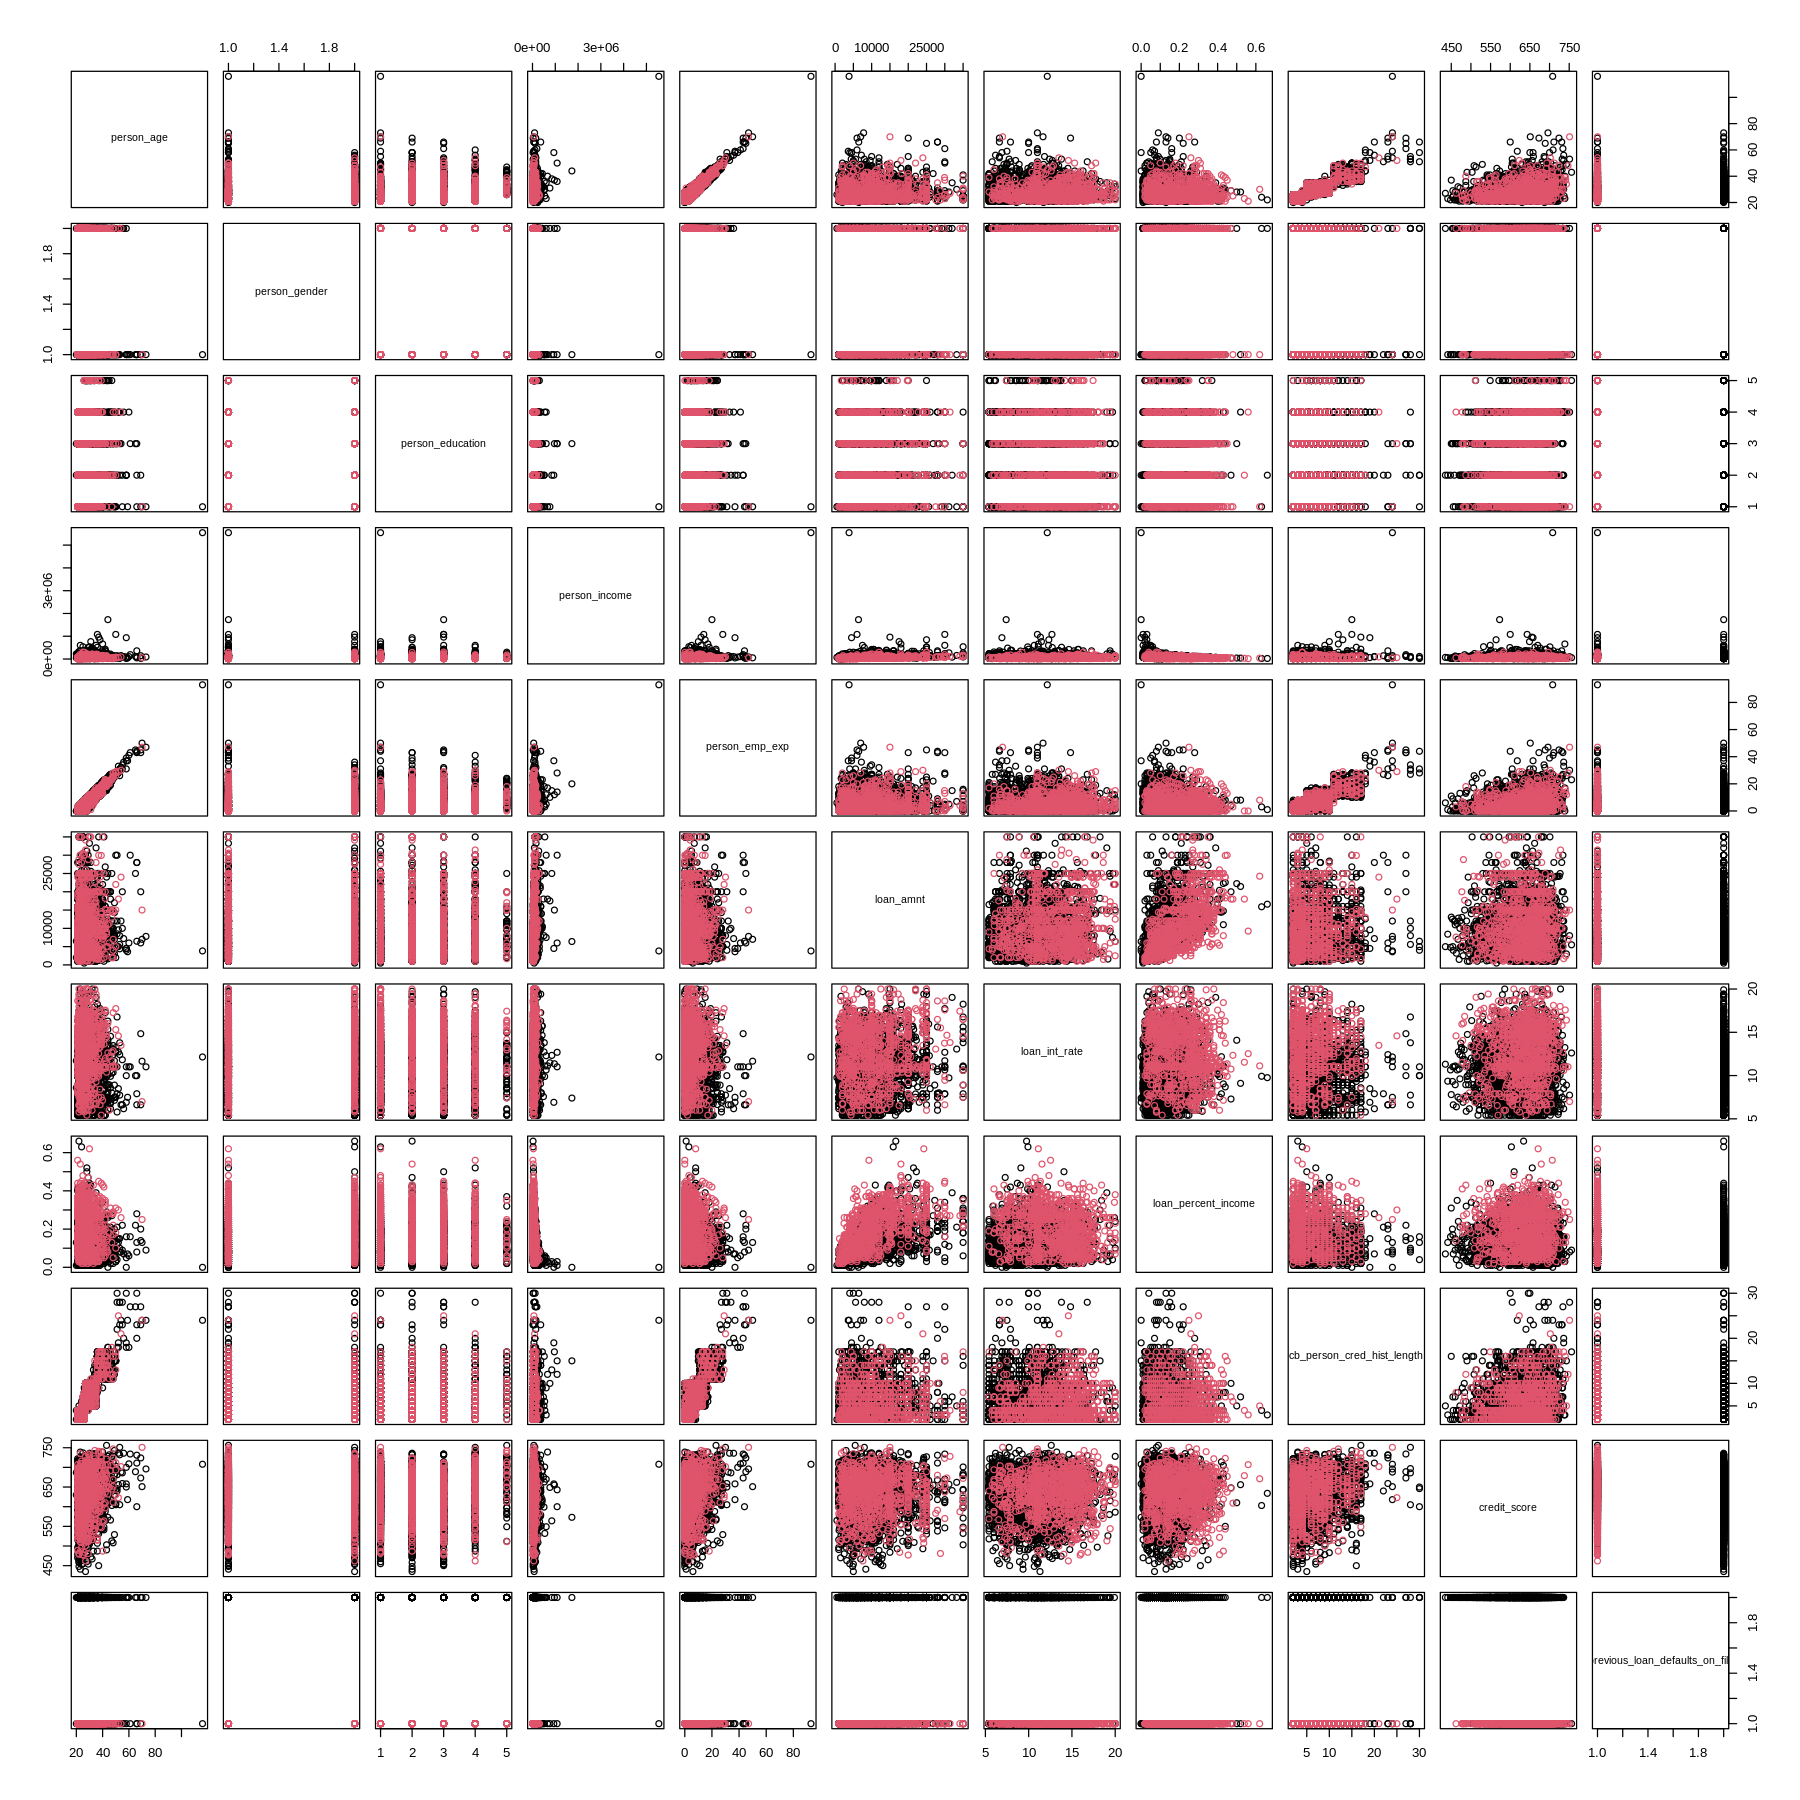

In [111]:
plot(data1,col=class)

### Clusters

In [112]:
cat("GAP: ", suppressWarnings(gapStatistic(data1, 10, 100)))

GAP:  2

In [113]:
regular = kmeans(data1, 2, iter.max = 10, nstart = 20)
log = kmeans(log(data1 + 1), 2, iter.max = 10, nstart = 20)
log_scale = kmeans(as.data.frame(scale(log(data1 + 1))), 2, iter.max = 10, nstart = 20)
log_scale_pca = kmeans(as.data.frame(prcomp(scale(log(data1 + 1)))$x), 2, iter.max = 10, nstart = 20)
log_pca_scale = kmeans(as.data.frame(scale(prcomp(log(data1 + 1))$x)), 2, iter.max = 10, nstart = 20)
scale = kmeans(as.data.frame(scale(data1)), 2, iter.max = 10, nstart = 20)
scale_pca = kmeans(as.data.frame(prcomp(scale(data1))$x), 2, iter.max = 10, nstart = 20)
pca_scale = kmeans(as.data.frame(scale(prcomp(data1)$x)), 2, iter.max = 10, nstart = 20)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 225000)”


Base

In [114]:
cont.table <- table(class, regular$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 77.76 %
     
class    2    1
    0 3499    1
    1 1000    0


Log

In [115]:
cont.table <- table(class, log$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.58 %
     
class    2    1
    0 1911 1589
    1  500  500


Log + Scale

In [116]:
cont.table <- table(class, log_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.67 %
     
class    1    2
    0 1900 1600
    1  575  425


Log + Scale + PCA

In [117]:
cont.table <- table(class, log_scale_pca$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.67 %
     
class    2    1
    0 1900 1600
    1  575  425


Log + PCA + Scale

In [118]:
cont.table <- table(class, log_pca_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 71.91 %
     
class    2    1
    0 2236 1264
    1    0 1000


Scale

In [119]:
cont.table <- table(class, scale$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 66.53 %
     
class    2    1
    0 2814  686
    1  820  180


Scale + PCA

In [120]:
cont.table <- table(class, scale_pca$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 66.53 %
     
class    1    2
    0 2814  686
    1  820  180


PCA + Scale

In [121]:
cont.table <- table(class, pca_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 71.91 %
     
class    2    1
    0 2236 1264
    1    0 1000


### Comentarios

En este caso, supongo que debido a que las clases eran muy disparejas, en casi todos los modelos se obtuvo un accuracy por debajo del 50% para la clase 1 (préstamo aprobado). Cabe aclarar que el modelo con mejor accuracy fue aquel que ubicó casi todas las muestras en un mismo cluster, lo que resultó en un "buen" resultado general. Sin embargo, al hacer esto, se alcanzó un 77% de accuracy general y un 100% en la clase 0, pero un 0% en la clase 1, lo que indica que no es un buen agrupamiento.

Igualmente, algo positivo de esta distribución es que GAP pudo encontrar satisfactoriamente la cantidad correcta de clusters.

## 10000 - 10000

In [175]:
data_0 <- data %>%
  filter(loan_status == 0) %>%
  sample_n(size = min(10000, n()))

data_1 <- data %>%
  filter(loan_status == 1)

data2 <- bind_rows(data_0, data_1)

class = factor(data2[, (ncol - 2)])

data2 <- data2[, -(ncol - 2)]

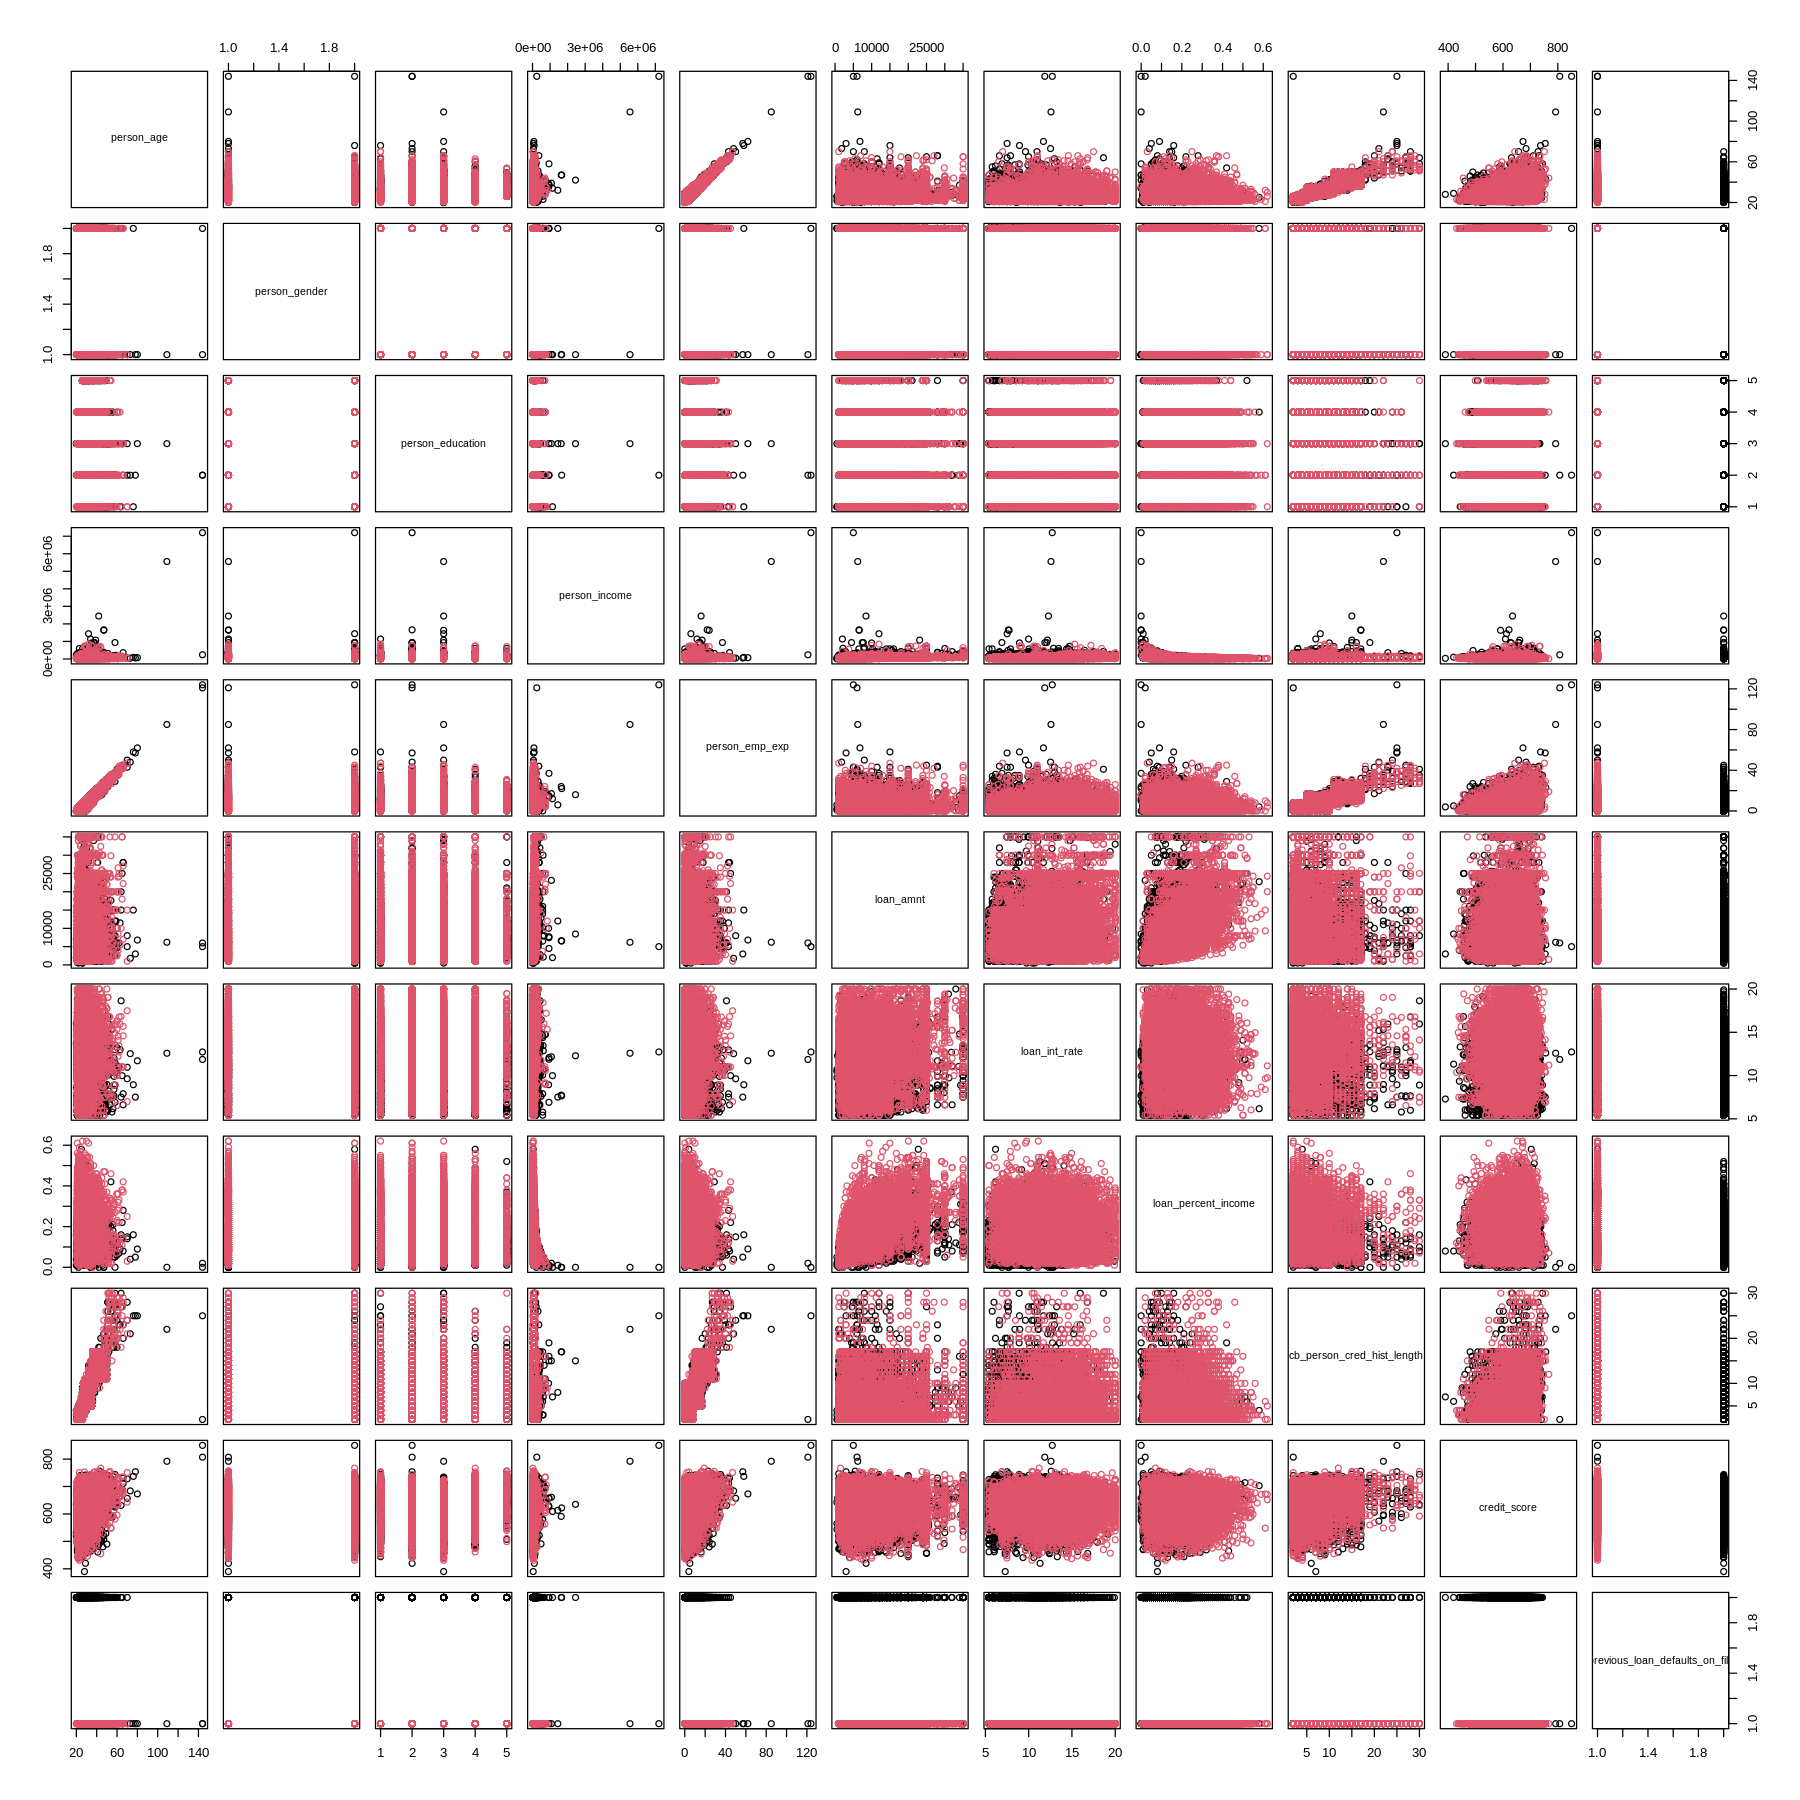

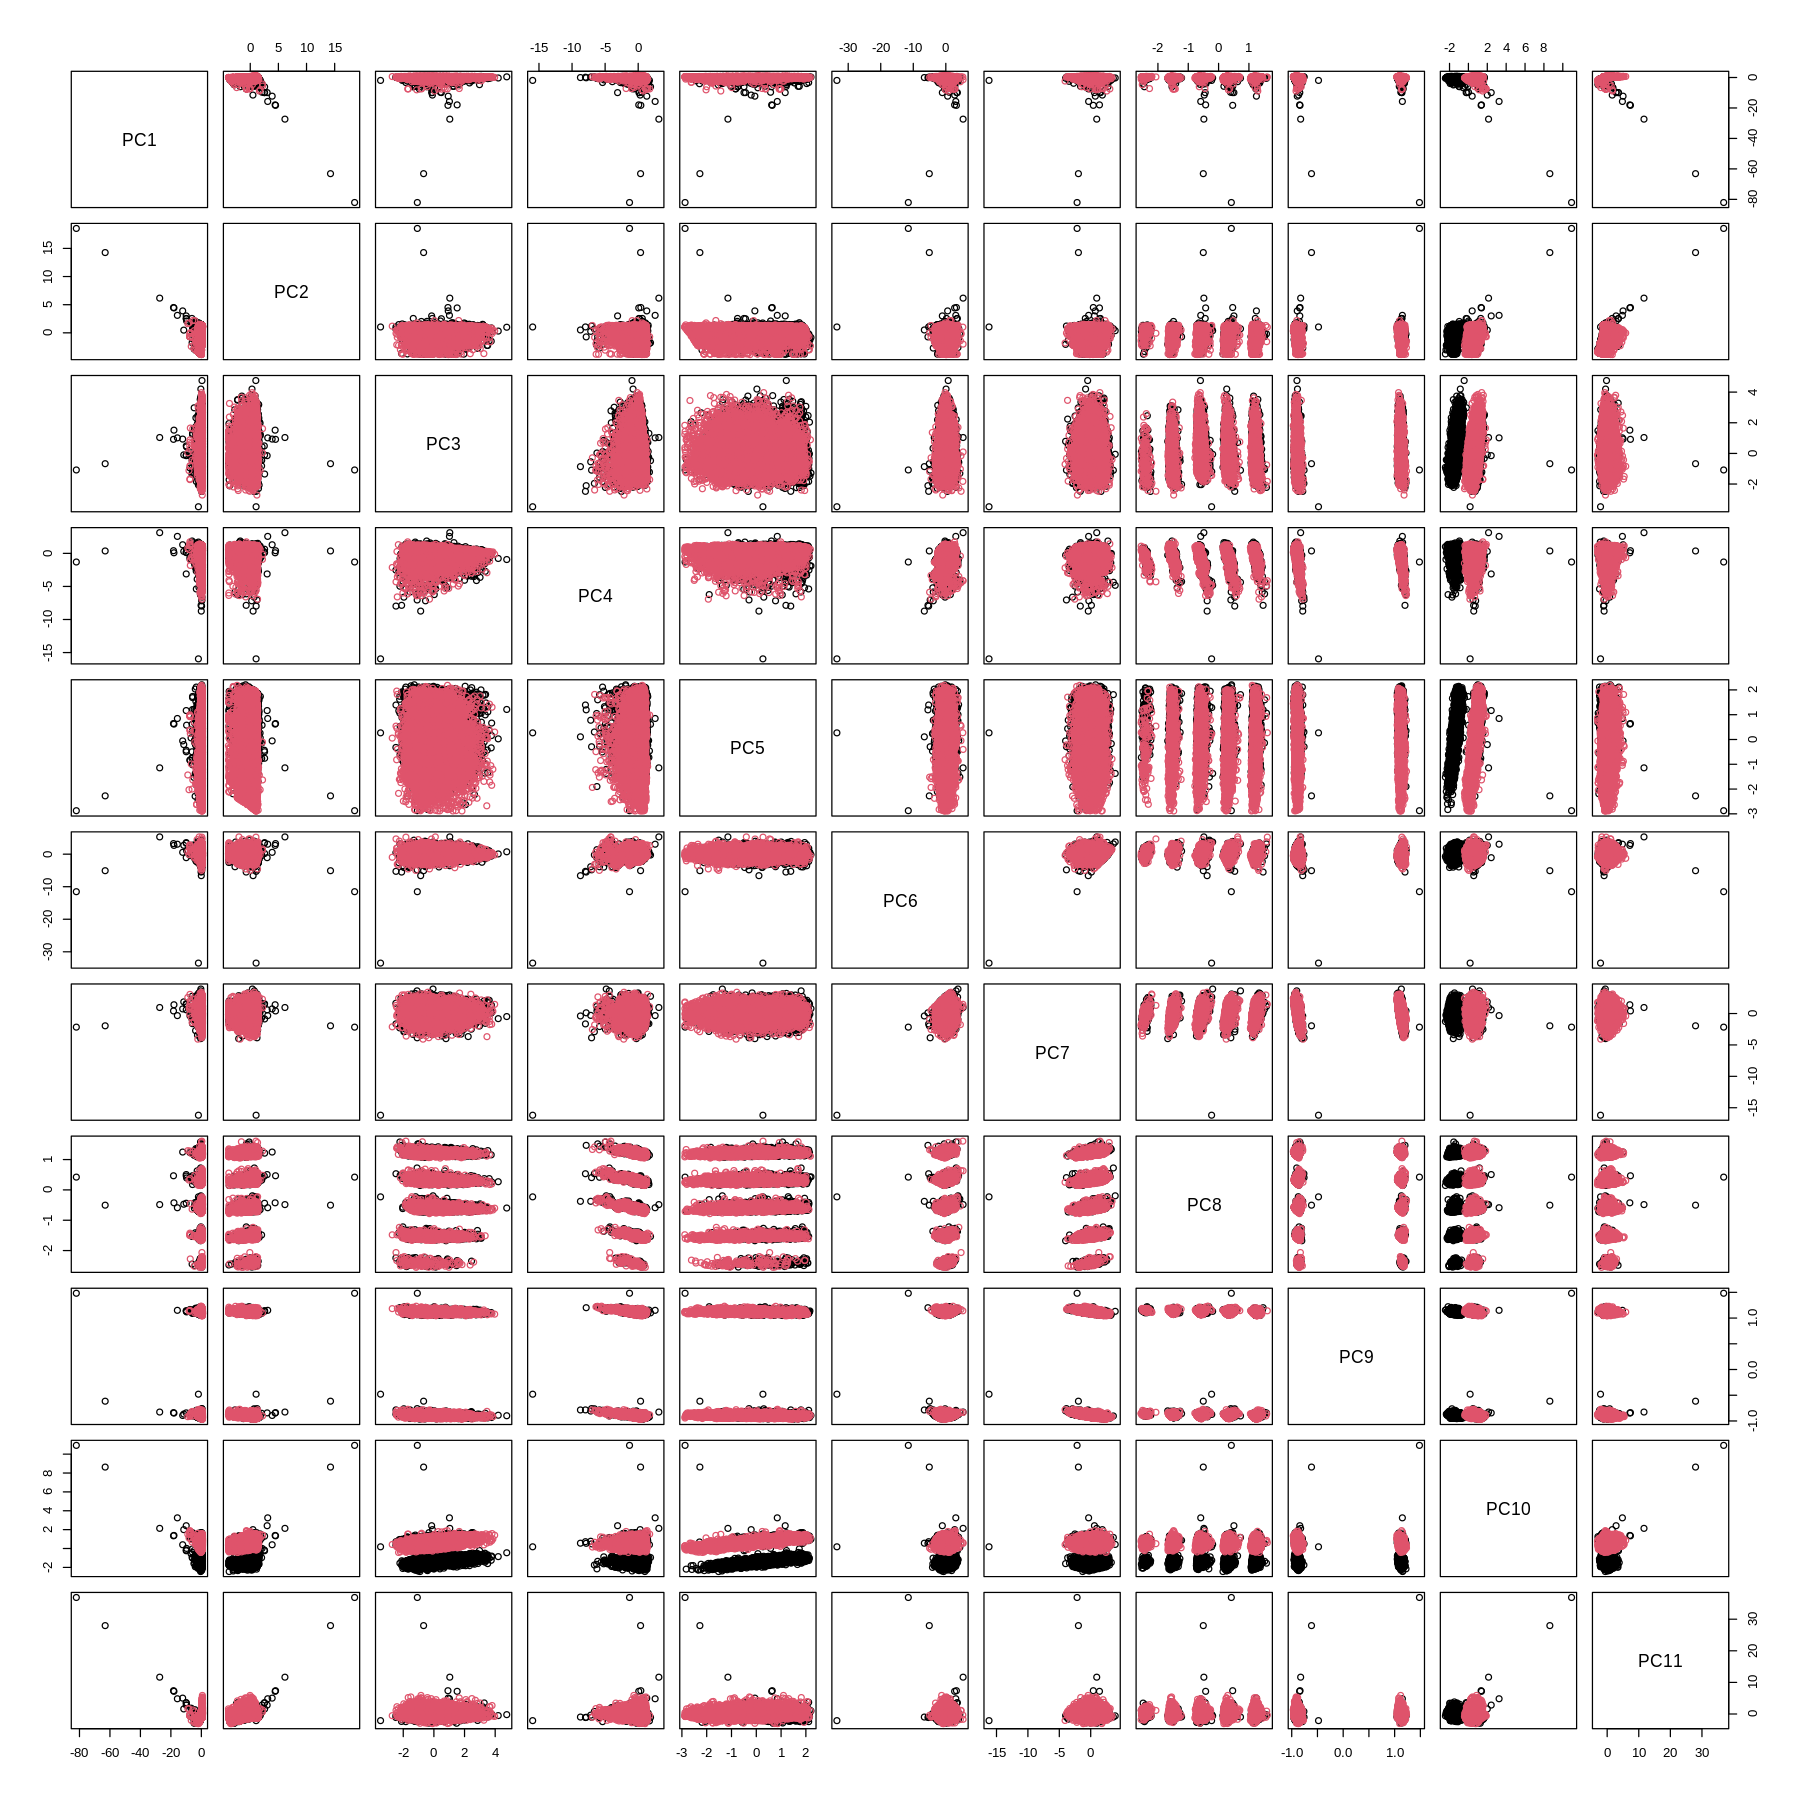

In [161]:
options(repr.plot.width = 15, repr.plot.height = 15)
plot(data2,col=class)
pairs(as.data.frame(scale(prcomp(data2)$x)),col=class)

### Clusters

In [176]:
cat("GAP: ", suppressWarnings(gapStatistic(data2, 10, 100)))

GAP:  2

In [163]:
regular = kmeans(data2, 2, iter.max = 10, nstart = 20)
log = kmeans(log(data2 + 1), 2, iter.max = 10, nstart = 20)
log_scale = kmeans(as.data.frame(scale(log(data2 + 1))), 2, iter.max = 10, nstart = 20)
log_scale_pca = kmeans(as.data.frame(prcomp(scale(log(data2 + 1)))$x), 2, iter.max = 10, nstart = 20)
log_pca_scale = kmeans(as.data.frame(scale(prcomp(log(data2 + 1))$x)), 2, iter.max = 10, nstart = 20)
scale = kmeans(as.data.frame(scale(data2)), 2, iter.max = 10, nstart = 20)
scale_pca = kmeans(as.data.frame(prcomp(scale(data2))$x), 2, iter.max = 10, nstart = 20)
pca_scale = kmeans(as.data.frame(scale(prcomp(data2)$x)), 2, iter.max = 10, nstart = 20)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1000000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1000000)”


Base

In [164]:
cont.table <- table(class, regular$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 52.24 %
     
class    2    1
    0  694 9306
    1  247 9753


Log

In [165]:
cont.table <- table(class, log$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.68 %
     
class    2    1
    0 5342 4658
    1 5006 4994


Log + Scale

In [166]:
cont.table <- table(class, log_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.17 %
     
class    1    2
    0 4449 5551
    1 4214 5786


Log + Scale + PCA

In [167]:
cont.table <- table(class, log_scale_pca$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.17 %
     
class    1    2
    0 4449 5551
    1 4214 5786


Log + PCA + Scale

In [168]:
cont.table <- table(class, log_pca_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 82.55 %
     
class     2     1
    0  6510  3490
    1     0 10000


Scale

In [169]:
cont.table <- table(class, scale$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.26 %
     
class    1    2
    0 2174 7826
    1 1923 8077


Scale + PCA

In [170]:
cont.table <- table(class, scale_pca$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.26 %
     
class    2    1
    0 2174 7826
    1 1923 8077


PCA + Scale

In [171]:
cont.table <- table(class, pca_scale$cluster)
class.match <- matchClasses(as.matrix(cont.table), method="exact")
print(cont.table[, class.match])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 82.55 %
     
class     2     1
    0  6510  3490
    1     0 10000


### Comentarios
Al igual que en la distribución anterior, GAP también pudo determinar la cantidad correcta de clusters.

En este caso, como se puede ver, con Log + PCA + Scale y con PCA + Scale se logró una accuracy del 83% (lo cual sugiere que aplicar escala logarítmica no aporta beneficios en este dataset). Este resultado se obtuvo ubicando cerca del 66% de las muestras en un cluster y el resto en el otro. De esta manera, además, se consiguió un 100% de accuracy para la clase 1 (préstamo aprobado) y un 65% para la clase 0.

También grafiqué las PCA con su escalado, y se puede ver cómo la PC10 logra diferenciar satisfactoriamente las muestras de diferentes clases. Supongo que esta fue la componente responsable de obtener buenos resultados en los modelos discutidos.

## Comentarios

Adicionalmente, intenté buscar clusters para predecir las variables person_education y una un tanto más polémica, person_gender (aunque no necesariamente los datos fueran reales). No pude obtener resultados satisfactorios para ninguna de estas clases, logrando una accuracy cercana al 25% y 50%, respectivamente. De cualquier manera, esto pudo deberse tanto a una falta de correlación entre estas variables y el resto, como a la falta de autenticidad de los datos.